# Edureka Techathon (25th July - 4th Aug 2019)

Participant: Joanna Khek Cuina

## Problem Statement

Purchasing a used car often leaves us confused. There are so many things to consider while making a purchase, such as the availability, demand, car model, product value, market trends and so on. Buying a used car can be quite a bit of a challenge.
Keeping this in mind, we hope you can help solve this mystery. The data for this challenge comprises of over 3000 observations of used cars that were put for an auction.
The data set has been cleaned up. However, there might be some technical issues, so make sure you build the solution accordingly.

You’re expected to study the data set and solve the following problems:
1. Perform feature selection by studying the relations between the variables in the data set and understand the importance of each variable with respect to the target feature, i.e., the price of the car.
2. Perform data wrangling, extensive EDA and define a performance metrics that describes the price of a used car.
3. Create a deployable model which takes test set as input and generates a csv file with predicted values of the target variable as output.

Hint: Each car type and car model may have different features.

## Data Set Description

The data set has 18 variables as listed below. feature1 – feature8 denote unknown features of the car that have been masked for privacy reasons. The impact of these 8 features must also be considered while building the model.  

Here’s a list of the variables present in the data set:

car_company: The name of the car manufacturing company   
model_ID: The model of the car       
mileage: Mileage of the car   
engine_power: Horsepower of the car   
registration_date: The date the car was registered   
fuel: Fuel used for the car   
car_paint_color: Colour of the car   
car_type: Type of the car (convertible, suv, etc)   
feature1: Unknown features that hold values as either true/false   
feature2: Unknown features that hold values as either true/false   
feature3: Unknown features that hold values as either true/false   
feature4: Unknown features that hold values as either true/false   
feature5: Unknown features that hold values as either true/false   
feature6: Unknown features that hold values as either true/false   
feature7 Unknown features that hold values as either true/false   
feature8: Unknown features that hold values as either true/false   
car_price: The price at which the car was sold   
sold_date: The date at which the car was sold   

## 1. Load required packages

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
#import missingno
import time
import itertools
import warnings
import keras
import xgboost as xgb
from sklearn.svm import SVR
import sklearn.metrics as metrics
from matplotlib import pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from sklearn.model_selection import KFold
%matplotlib inline
warnings.filterwarnings('ignore')

In [26]:
# changing the display settings
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', -1)  

## 2. Import the data-set

In [3]:
# import data
data = pd.read_csv("data.csv")

In [4]:
data.columns

Index(['car_company', 'model_ID', 'mileage', 'engine_power',
       'registration_date', 'fuel', 'car_paint_color', 'car_type', 'feature1',
       'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7',
       'feature8', 'sold_date', 'car_price'],
      dtype='object')

## 3. Data pre-processing

### Missing Values

There are no missing values detected in this dataset

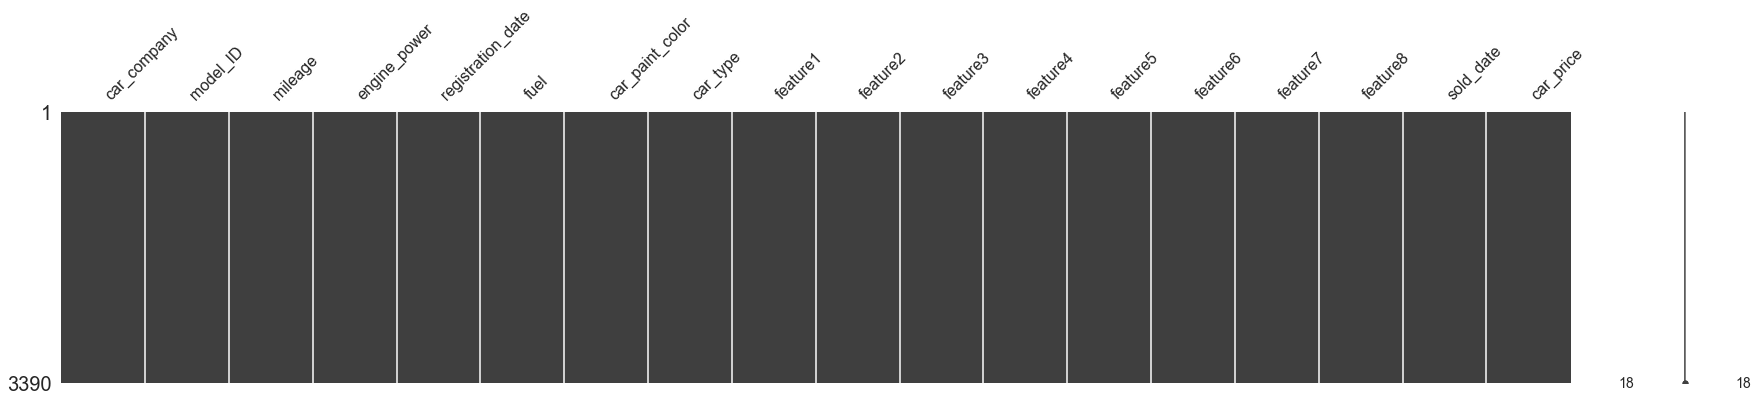

In [1703]:
missingno.matrix(data, figsize = (30,5))

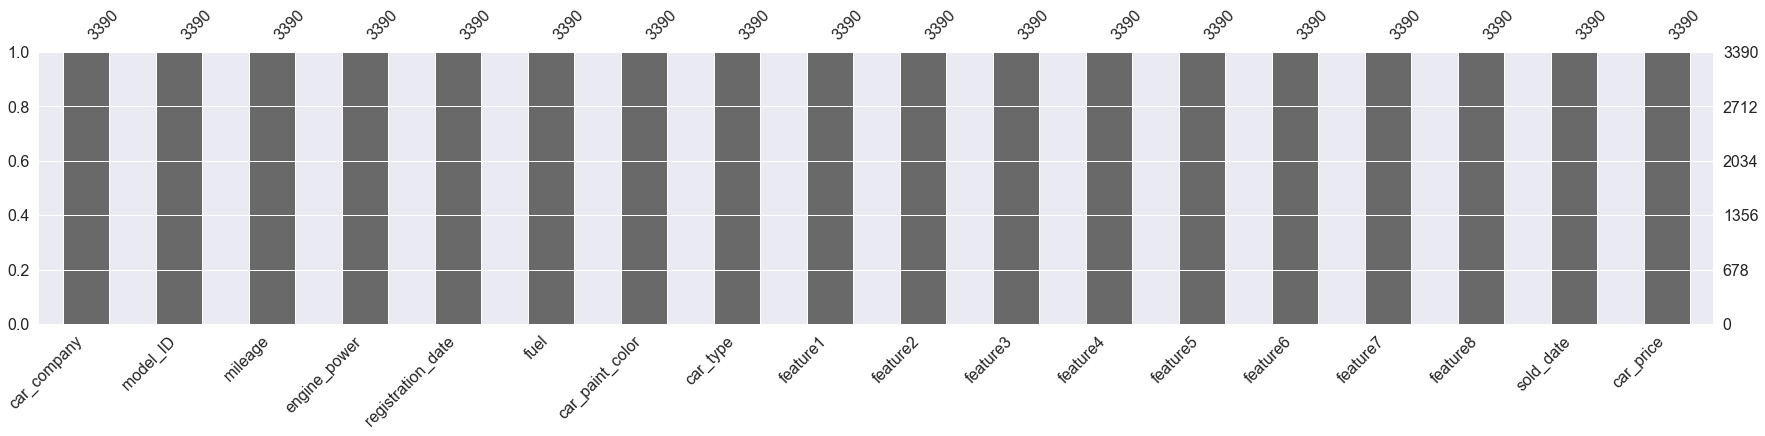

In [1704]:
missingno.bar(data, sort='ascending', figsize = (30,5))

### Changing datatype

In [5]:
# look at the data type
data.dtypes

car_company          object
model_ID             object
mileage              int64 
engine_power         int64 
registration_date    object
fuel                 object
car_paint_color      object
car_type             object
feature1             bool  
feature2             bool  
feature3             bool  
feature4             bool  
feature5             bool  
feature6             bool  
feature7             bool  
feature8             bool  
sold_date            object
car_price            int64 
dtype: object

In [6]:
# convert registration_date to datetime format
data["registration_date"] = pd.to_datetime(data["registration_date"], format="%d-%m-%Y")

In [7]:
data["sold_date"]

0       01-03-2018
1       01-05-2018
2       01-06-2018
3       01-03-2018
4       01-05-2018
5       01-03-2018
6       01-08-2018
7       01-06-2018
8       01-04-2018
9       01-03-2018
10      01-03-2018
11      01-05-2018
12      01-05-2018
13      01-05-2018
14      01-02-2018
15      01-06-2018
16      01-05-2018
17      01-01-2018
18      01-07-2018
19      01-04-2018
20      01-01-2018
21      01-05-2018
22      01-07-2018
23      01-06-2018
24      01-05-2018
25      01-02-2018
26      01-08-2018
27      01-03-2018
28      01-02-2018
29      01-04-2018
30      01-03-2018
31      01-08-2018
32      01-02-2018
33      01-05-2018
34      01-05-2018
35      01-08-2018
36      01-05-2018
37      01-05-2018
38      01-02-2018
39      01-06-2018
40      01-07-2018
41      01-05-2018
42      01-09-2018
43      01-07-2018
44      01-04-2018
45      01-07-2018
46      01-04-2018
47      01-04-2018
48      01-03-2018
49      01-09-2018
50      01-04-2018
51      01-02-2018
52      01-0

In [8]:
# convert sold_date to datetime format
data["sold_date"] = pd.to_datetime(data["sold_date"], format="%d-%m-%Y")

### Encoding categorical data

In [9]:
# fuel
data["fuel"].value_counts()
fuel = pd.get_dummies(data["fuel"], prefix='fuel', drop_first=True)
data = pd.concat([data, fuel],axis=1)

In [10]:
# car paint color
data["car_paint_color"].value_counts()
car_paint_color = pd.get_dummies(data["car_paint_color"], prefix='car_paint_color', drop_first=True)
data = pd.concat([data, car_paint_color],axis=1)

In [11]:
# car type
data["car_type"].value_counts()
car_type = pd.get_dummies(data["car_type"],prefix='car_type', drop_first=True) 
data = pd.concat([data, car_type],axis=1)

In [12]:
# features 1
data["feature1"].value_counts()
feature1 = pd.get_dummies(data["feature1"], prefix='feature1',drop_first=True)
data = pd.concat([data, feature1],axis=1)

# feature 2
data["feature2"].value_counts()
feature2 = pd.get_dummies(data["feature2"], prefix='feature2',drop_first=True)
data = pd.concat([data, feature2],axis=1)

# feature 3
data["feature3"].value_counts()
feature3 = pd.get_dummies(data["feature3"], prefix='feature3',drop_first=True)
data = pd.concat([data, feature3],axis=1)

# feature 4
data["feature4"].value_counts()
feature4 = pd.get_dummies(data["feature4"], prefix='feature4',drop_first=True)
data = pd.concat([data, feature4],axis=1)

# feature 5
data["feature5"].value_counts()
feature5 = pd.get_dummies(data["feature5"], prefix='feature5',drop_first=True)
data = pd.concat([data, feature5],axis=1)

# feature 6
data["feature6"].value_counts()
feature6 = pd.get_dummies(data["feature6"], prefix='feature6',drop_first=True)
data = pd.concat([data, feature6],axis=1)

# feature 7
data["feature7"].value_counts()
feature7 = pd.get_dummies(data["feature7"], prefix='feature7',drop_first=True)
data = pd.concat([data, feature7],axis=1)

# feature 8
data["feature8"].value_counts()
feature8 = pd.get_dummies(data["feature8"], prefix='feature8',drop_first=True)
data = pd.concat([data, feature8],axis=1)

### Feature Engineering

Since there are too many different model ID, we will attempt to group them according to their series type

In [13]:
data["model_ID"]

0       318 Gran Turismo 
1       218 Active Tourer
2       318              
3       320 Gran Turismo 
4       518              
5       520              
6       X5               
7       116              
8       530              
9       318 Gran Turismo 
10      320              
11      118              
12      X6               
13      520              
14      X3               
15      118              
16      320              
17      420 Gran Coupé   
18      320 Gran Turismo 
19      318 Gran Turismo 
20      320              
21      520              
22      320              
23      116              
24      320              
25      640              
26      320              
27      X5               
28      518              
29      525              
30      320              
31      X1               
32      318              
33      420 Gran Coupé   
34      520              
35      X3               
36      320              
37      420              
38      X3  

In [14]:
##### MODEL ID #####
# since there are too many car models, we will group it into gran coupe, gran turismo, active tourer and normal
car_series = []
for i in range(0,len(data)):
    if ("Gran Turismo" in data["model_ID"][i]):
        car_series.append("Gran Turismo")
    elif ("Active Tourer" in data["model_ID"][i]):
        car_series.append("Active Tourer")
    elif ("Gran Coupé" in data["model_ID"][i]):
        car_series.append("Gran Coupé")
    elif ("Gran Tourer" in data["model_ID"][i]):
        car_series.append("Gran Tourer")
    else:
        if (data["model_ID"][i][0] == "3"):
            car_series.append("300 Series")
        elif (data["model_ID"][i][0] == "5"):
            car_series.append("500 Series")
        elif (data["model_ID"][i][0] == "X"):
            car_series.append("X Series")
        elif (data["model_ID"][i][0] == "1"):
            car_series.append("100 Series")
        elif (data["model_ID"][i][0] == "6"):
            car_series.append("600 Series")
        elif (data["model_ID"][i][0] == "4"):
            car_series.append("400 Series")
        elif (data["model_ID"][i][0] == "7"):
            car_series.append("700 Series")
        elif (data["model_ID"][i][0] == "2"):
            car_series.append("200 Series")
        elif (data["model_ID"][i][0] == "i"):
            car_series.append("i Series")
        elif (data["model_ID"][i][0] == "Z"):
            car_series.append("Z Series")
        elif (data["model_ID"][i][0] == "M"):
            car_series.append("M Series")
        else:
            car_series.append("Error")

In [15]:
# add to the full dataset
data["car_series"] = car_series

In [16]:
# create dummy variable for car series
car_series = pd.get_dummies(data["car_series"], prefix='car_series',drop_first=True) 
# concat with original data
data = pd.concat([data, car_series],axis=1)

In [17]:
##### REGISTRATION AND SOLD DATE #####
# create another column for the duration
data["duration_sold_reg"] = data["sold_date"] - data["registration_date"]
data["duration_sold_reg"] = data["duration_sold_reg"].apply(lambda x: str(x).split("days")[0])
data["duration_sold_reg"] = data["duration_sold_reg"].astype(float)

In [18]:
##### FEATURES #####
# create another column for total number of features
feature = ['feature1_True', 'feature2_True', 'feature3_True', 'feature4_True', 'feature5_True', 'feature6_True',
           'feature7_True', 'feature8_True']
data["feature_total"] = data.loc[:,feature].sum(axis=1)

In [19]:
data.columns

Index(['car_company', 'model_ID', 'mileage', 'engine_power',
       'registration_date', 'fuel', 'car_paint_color', 'car_type', 'feature1',
       'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7',
       'feature8', 'sold_date', 'car_price', 'fuel_electro',
       'fuel_hybrid_petrol', 'fuel_petrol', 'car_paint_color_black',
       'car_paint_color_blue', 'car_paint_color_brown',
       'car_paint_color_green', 'car_paint_color_grey',
       'car_paint_color_orange', 'car_paint_color_red',
       'car_paint_color_silver', 'car_paint_color_white', 'car_type_coupe',
       'car_type_estate', 'car_type_hatchback', 'car_type_sedan',
       'car_type_subcompact', 'car_type_suv', 'car_type_van', 'feature1_True',
       'feature2_True', 'feature3_True', 'feature4_True', 'feature5_True',
       'feature6_True', 'feature7_True', 'feature8_True', 'car_series',
       'car_series_200 Series', 'car_series_300 Series',
       'car_series_400 Series', 'car_series_500 Series',
 

In [27]:
##### clustering the car model #####
model_cluster = data.loc[:,['car_series_200 Series', 'car_series_300 Series',
       'car_series_400 Series', 'car_series_500 Series',
       'car_series_600 Series', 'car_series_700 Series',
       'car_series_Active Tourer', 'car_series_Gran Coupé',
       'car_series_Gran Tourer', 'car_series_Gran Turismo',
       'car_series_M Series', 'car_series_X Series', 'car_series_Z Series',
       'car_series_i Series','car_type_coupe', 'car_type_estate',
       'car_type_hatchback', 'car_type_sedan', 'car_type_subcompact',
       'car_type_suv', 'car_type_van', 'feature1_True',
       'feature2_True', 'feature3_True', 'feature4_True', 'feature5_True',
       'feature6_True', 'feature7_True', 'feature8_True']]

In [28]:
# Elbow Method
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(model_cluster)
    Sum_of_squared_distances.append(km.inertia_)

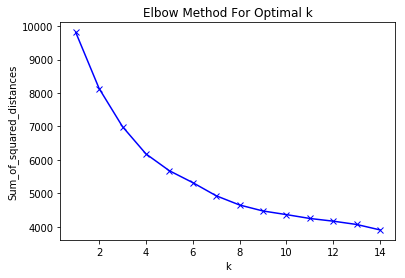

In [29]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [30]:
# KMeans
km = KMeans(n_clusters = 8)
km = km.fit(model_cluster)

In [31]:
data["car_model_cluster"] = km.labels_

In [32]:
data["car_model_cluster"].value_counts()

0    686
3    459
7    433
6    419
5    406
1    404
2    332
4    251
Name: car_model_cluster, dtype: int64

In [33]:
car_model_cluster = pd.get_dummies(data["car_model_cluster"], prefix='car_model_cluster',drop_first=True)
data = pd.concat([data, car_model_cluster],axis=1)

In [34]:
# summary statistics of each cluster
data.groupby("car_model_cluster").describe()

mileage                                                   \
                    count           mean           std      min        25%   
car_model_cluster                                                            
0                  686.0   151365.026239  53212.998830  3478.0   117621.50   
1                  404.0   149183.586634  57934.894127 -64.0     113494.75   
2                  332.0   122959.439759  50694.356207  2970.0   87486.50    
3                  459.0   122160.444444  72821.004521  2399.0   74096.50    
4                  251.0   122241.183267  64191.369103  6572.0   70860.00    
5                  406.0   166105.465517  62206.570382  9406.0   126484.75   
6                  419.0   133616.408115  59020.509218  4530.0   91566.50    
7                  433.0   150006.778291  56697.060833  18951.0  111994.00   

                                                  engine_power              \
                        50%        75%        max        count        mean   
car_model_cluster                                                            
0                  151909.5  178076.25  400654.0   686.0        113.962099   
1                  148109.0  181883.75  439060.0   404.0        151.210396   
2                  120529.5  156320.00  350615.0   332.0        124.415663   
3                  121953.0  157641.50  1000376.0  459.0        96.209150    
4                  121363.0  162950.00  375686.0   251.0        141.864542   
5                  158457.5  193970.00  484615.0   406.0        144.502463   
6                  132927.0  169520.00  364547.0   419.0        166.961814   
7                  147955.0  179329.00  405816.0   433.0        111.000000   

                                                                car_price  \
                         std    min    25%    50%    75%    max     count   
car_model_cluster                                                           
0                  21.282151  80.0   100.0  105.0  135.0  230.0  686.0      
1                  42.603286  85.0   120.0  135.0  180.0  412.0  404.0      
2                  34.619408  0.0    105.0  120.0  135.0  423.0  332.0      
3                  21.136896  25.0   85.0   85.0   105.0  270.0  459.0      
4                  45.790366  75.0   105.0  135.0  143.5  317.0  251.0      
5                  32.803022  100.0  120.0  135.0  160.0  280.0  406.0      
6                  41.553833  100.0  135.0  155.0  190.0  300.0  419.0      
7                  21.180005  66.0   100.0  105.0  120.0  225.0  433.0      

                                                                         \
                           mean           std     min      25%      50%   
car_model_cluster                                                         
0                  11410.641399  4280.062814   100.0   9500.0   11700.0   
1                  19475.247525  8975.521229   100.0   14900.0  18100.0   
2                  16694.879518  12674.524404  100.0   11900.0  14450.0   
3                  10878.431373  4351.668974   900.0   8700.0   10500.0   
4                  20162.151394  8287.043004   5400.0  14950.0  18600.0   
5                  15955.418719  5500.546119   800.0   13300.0  15750.0   
6                  26105.727924  13142.702803  4600.0  16850.0  22700.0   
7                  11985.681293  4350.817086   400.0   10500.0  12400.0   

                                     fuel_electro                           \
                       75%       max        count      mean       std  min   
car_model_cluster                                                            
0                  14000.0  36000.0   686.0        0.000000  0.000000  0.0   
1                  22000.0  75000.0   404.0        0.000000  0.000000  0.0   
2                  17700.0  178500.0  332.0        0.000000  0.000000  0.0   
3                  13200.0  31000.0   459.0        0.004357  0.065938  0.0   
4                  24300.0  69700.0   251.0        0.003984  0.063119  0.0   
5 

## 4. Exploratory Data Analysis

### Car Company

There is not much information we can gain here. We will not use this information in our model.

In [35]:
data["car_company"].value_counts()

Edureka_motors    3390
Name: car_company, dtype: int64

### Car Price

There seems to be extreme outliers. We will investigate further before we remove it.

In [36]:
# summary statistics of car price
data["car_price"].describe()

count    3390.000000  
mean     15899.203540 
std      9444.167874  
min      100.000000   
25%      10900.000000 
50%      14200.000000 
75%      18600.000000 
max      178500.000000
Name: car_price, dtype: float64

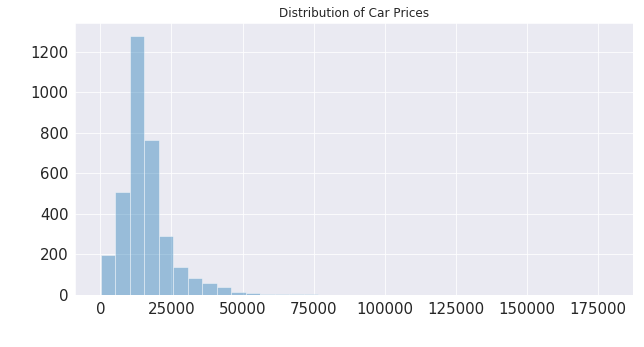

In [37]:
# distribution of car prices
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
b = sns.distplot(data["car_price"],kde=False,bins=35)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title("Distribution of Car Prices")
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

### Car Model

In [38]:
# how many models are there?
data["model_ID"].value_counts()

320                  530
520                  449
318                  397
X3                   307
116                  254
X1                   188
316                  166
X5                   165
525                  123
530                  99 
118                  99 
318 Gran Turismo     74 
320 Gran Turismo     55 
518                  42 
X6                   35 
X4                   34 
420                  33 
535                  33 
420 Gran Coupé       24 
120                  21 
330                  20 
730                  20 
640 Gran Coupé       15 
520 Gran Turismo     14 
530 Gran Turismo     13 
325                  13 
X5 M                 13 
740                  12 
218 Active Tourer    12 
114                  11 
M550                 9  
218                  7  
X6 M                 6  
218 Gran Tourer      6  
528                  6  
i3                   6  
418 Gran Coupé       5  
640                  5  
335                  5  
216 Gran Tourer      4  


In [39]:
# what is the breakdown of the different type of car series?
data["car_series"].value_counts()

300 Series       1135
500 Series       754 
X Series         750 
100 Series       395 
Gran Turismo     162 
Gran Coupé       49  
400 Series       38  
700 Series       33  
M Series         19  
Active Tourer    17  
Gran Tourer      11  
200 Series       10  
600 Series       8   
i Series         6   
Z Series         3   
Name: car_series, dtype: int64

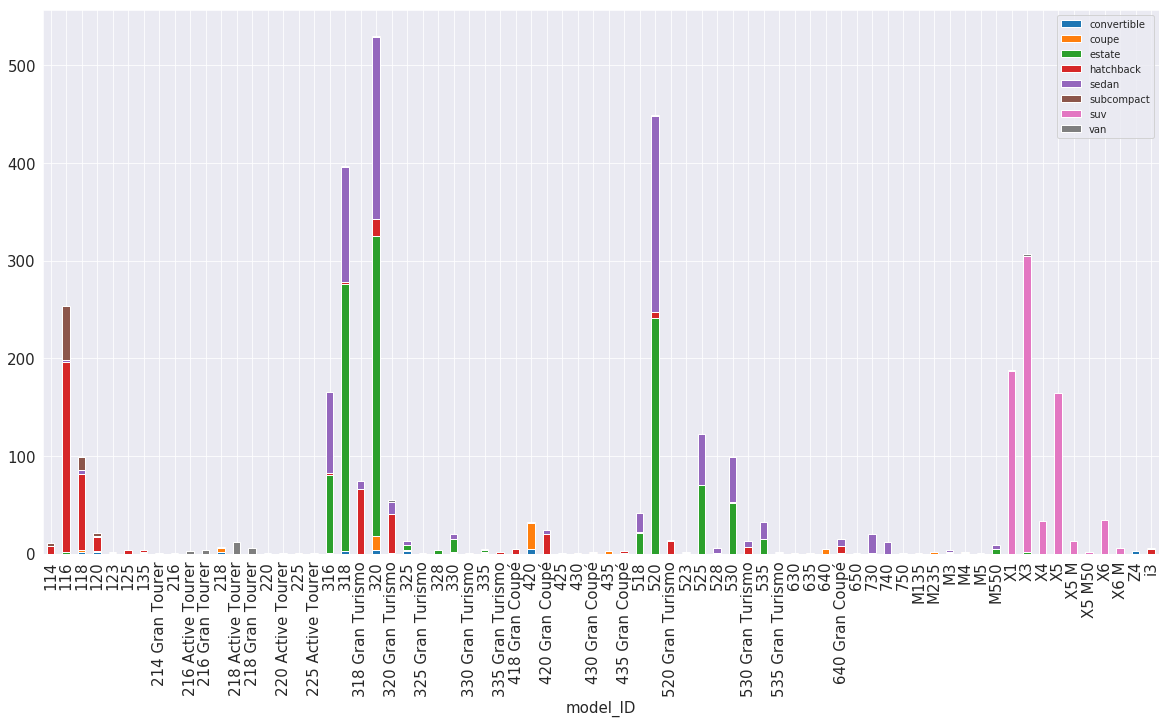

In [40]:
# what are the different models under each car type?
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["axes.labelsize"] = 15
df = data.groupby('model_ID').apply(lambda x: x['car_type'].value_counts())
df = df.unstack()
df.plot.bar(stacked=True)
plt.show()

In [43]:
# correlation plot for car type and features
car_type_feature = data.loc[:,['car_type_coupe', 'car_type_estate',
       'car_type_hatchback', 'car_type_sedan', 'car_type_subcompact',
       'car_type_suv', 'car_type_van', 'feature1_True', 'feature2_True',
       'feature3_True', 'feature4_True', 'feature5_True', 'feature6_True',
       'feature7_True', 'feature8_True']]

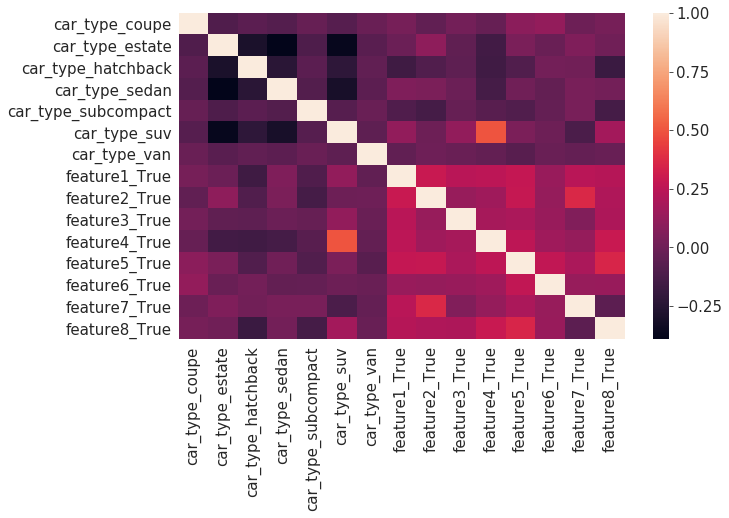

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(car_type_feature.corr())

In [45]:
corr_matrix = car_type_feature.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
print(sol)

car_type_suv         feature4_True          0.501461
car_type_estate      car_type_sedan         0.392055
feature2_True        feature7_True          0.368006
car_type_estate      car_type_suv           0.366906
feature5_True        feature8_True          0.353849
car_type_sedan       car_type_suv           0.301488
feature1_True        feature2_True          0.297503
feature4_True        feature8_True          0.296166
car_type_estate      car_type_hatchback     0.289330
feature2_True        feature5_True          0.283462
feature1_True        feature5_True          0.281494
feature5_True        feature6_True          0.268012
feature4_True        feature5_True          0.259077
feature1_True        feature4_True          0.249703
                     feature7_True          0.243445
                     feature3_True          0.238932
car_type_hatchback   car_type_sedan         0.237743
feature1_True        feature8_True          0.229818
car_type_hatchback   car_type_suv           0.

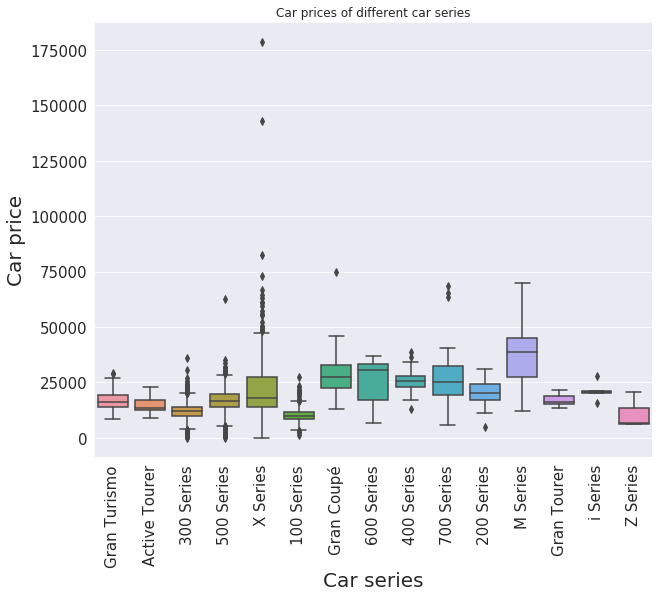

In [46]:
# what are the car prices for the different series?
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
b = sns.boxplot(x="car_series", y="car_price", data=data)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title("Car prices of different car series")
plt.ylabel("Car price")
plt.xlabel("Car series")
plt.xticks(rotation=90)
plt.show()

In [47]:
data["car_series"].value_counts()

300 Series       1135
500 Series       754 
X Series         750 
100 Series       395 
Gran Turismo     162 
Gran Coupé       49  
400 Series       38  
700 Series       33  
M Series         19  
Active Tourer    17  
Gran Tourer      11  
200 Series       10  
600 Series       8   
i Series         6   
Z Series         3   
Name: car_series, dtype: int64

In [48]:
# identifying the extreme outliers
data[data["car_price"] >125000]

,car_company,model_ID,mileage,engine_power,registration_date,fuel,car_paint_color,car_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,sold_date,car_price,fuel_electro,fuel_hybrid_petrol,fuel_petrol,car_paint_color_black,car_paint_color_blue,car_paint_color_brown,car_paint_color_green,car_paint_color_grey,car_paint_color_orange,car_paint_color_red,car_paint_color_silver,car_paint_color_white,car_type_coupe,car_type_estate,car_type_hatchback,car_type_sedan,car_type_subcompact,car_type_suv,car_type_van,feature1_True,feature2_True,feature3_True,feature4_True,feature5_True,feature6_True,feature7_True,feature8_True,car_series,car_series_200 Series,car_series_300 Series,car_series_400 Series,car_series_500 Series,car_series_600 Series,car_series_700 Series,car_series_Active Tourer,car_series_Gran Coupé,car_series_Gran Tourer,car_series_Gran Turismo,car_series_M Series,car_series_X Series,car_series_Z Series,car_series_i Series,duration_sold_reg,feature_total,car_model_cluster,car_model_cluster_1,car_model_cluster_2,car_model_cluster_3,car_model_cluster_4,car_model_cluster_5,car_model_cluster_6,car_model_cluster_7
499,Edureka_motors,X4,103222,140,2014-08-01,diesel,grey,suv,True,True,False,False,True,False,True,True,2018-08-01,142800,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,1,1,X Series,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1461.0,5,6,0,0,0,0,0,1,0
505,Edureka_motors,X3,72515,135,2013-03-01,diesel,blue,suv,False,False,True,False,False,False,False,True,2018-08-01,178500,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,X Series,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1979.0,2,2,0,1,0,0,0,0,0


In [49]:
# remove extreme outliers
data = data.drop(data[data["car_price"] >125000].index,axis=0)

In [50]:
# reset index
data = data.reset_index()
data = data.drop("index", axis=1)

###  Car Type

Most of the cars are estate, sedan, suv and hatchback. Price for suv, coupe, sedan and convertible are much higher and they have more number of features compared to the other types

In [51]:
# how many car types are there?
data["car_type"].value_counts()

estate         1095
sedan          826 
suv            744 
hatchback      506 
subcompact     79  
coupe          71  
van            35  
convertible    32  
Name: car_type, dtype: int64

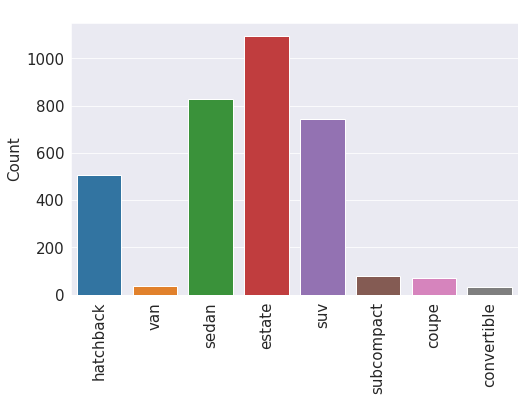

In [52]:
# what are the different types of car?
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
b = sns.countplot(x="car_type", data=data)
b.axes.set_title("Title",fontsize=10)
b.set_xlabel("X Label",fontsize=15)
b.set_ylabel("Y Label",fontsize=15)
b.tick_params(labelsize=15)
plt.title(" ")
plt.ylabel("Count")
plt.xlabel(" ")
plt.xticks(rotation=90)
plt.show()

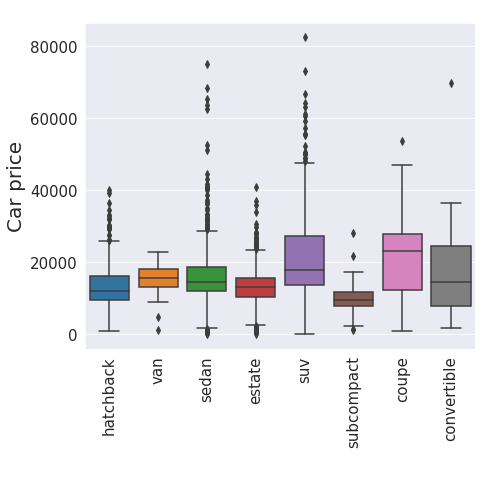

In [53]:
# What is the car price for the different car type?
plt.figure(figsize=(7,6))
sns.set_style("darkgrid")
b = sns.boxplot(x="car_type", y="car_price", data=data)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title(" ")
plt.ylabel("Car price")
plt.xlabel(" ")
plt.xticks(rotation=90)
plt.show()

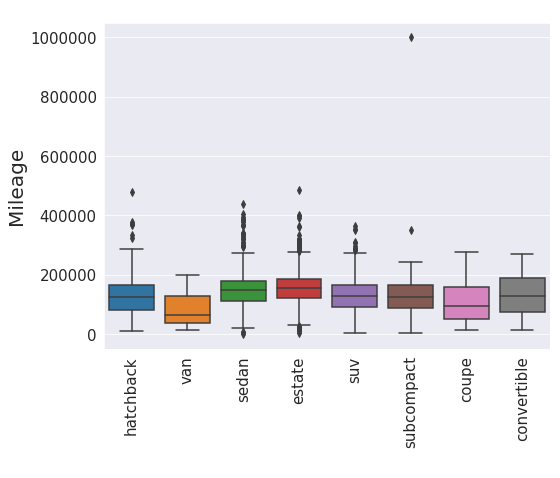

In [54]:
# What is the mileage distribution for the different car type?
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
b = sns.boxplot(x="car_type", y="mileage", data=data)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title(" ")
plt.ylabel("Mileage")
plt.xlabel(" ")
plt.xticks(rotation=90)
plt.show()

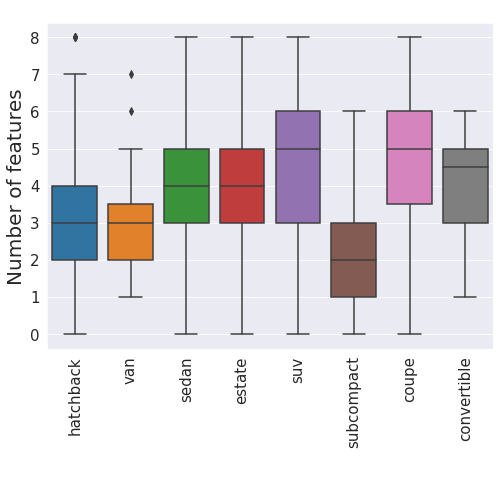

In [55]:
# What is the number of features for each car type?
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
b = sns.boxplot(x="car_type", y="feature_total", data=data)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title(" ")
plt.ylabel("Number of features")
plt.xlabel(" ")
plt.xticks(rotation=90)
plt.show()

### Mileage

There is a data entry error and an extreme outlier detected. We will remove the extreme outlier. The minimum mileage value is negative which is not logical. We will replace it with the mean value according to the model ID and car type. Cars typically fetches a higher value when the mileage value is low

In [56]:
# summary statistics of mileage
data["mileage"].describe()

count    3.388000e+03
mean     1.416424e+05
std      6.142722e+04
min     -6.400000e+01
25%      1.033308e+05
50%      1.417210e+05
75%      1.753102e+05
max      1.000376e+06
Name: mileage, dtype: float64

In [57]:
# identify negative mileage value
data[data["mileage"] < 0]

,car_company,model_ID,mileage,engine_power,registration_date,fuel,car_paint_color,car_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,sold_date,car_price,fuel_electro,fuel_hybrid_petrol,fuel_petrol,car_paint_color_black,car_paint_color_blue,car_paint_color_brown,car_paint_color_green,car_paint_color_grey,car_paint_color_orange,car_paint_color_red,car_paint_color_silver,car_paint_color_white,car_type_coupe,car_type_estate,car_type_hatchback,car_type_sedan,car_type_subcompact,car_type_suv,car_type_van,feature1_True,feature2_True,feature3_True,feature4_True,feature5_True,feature6_True,feature7_True,feature8_True,car_series,car_series_200 Series,car_series_300 Series,car_series_400 Series,car_series_500 Series,car_series_600 Series,car_series_700 Series,car_series_Active Tourer,car_series_Gran Coupé,car_series_Gran Tourer,car_series_Gran Turismo,car_series_M Series,car_series_X Series,car_series_Z Series,car_series_i Series,duration_sold_reg,feature_total,car_model_cluster,car_model_cluster_1,car_model_cluster_2,car_model_cluster_3,car_model_cluster_4,car_model_cluster_5,car_model_cluster_6,car_model_cluster_7
2929,Edureka_motors,640 Gran Coupé,-64,230,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,2018-04-01,75000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,Gran Coupé,0,0,0,0,0,0,0,1,0,0,0,0,0,0,396.0,5,1,1,0,0,0,0,0,0


In [58]:
data = data.drop(data[data["mileage"] < 0].index,axis=0)

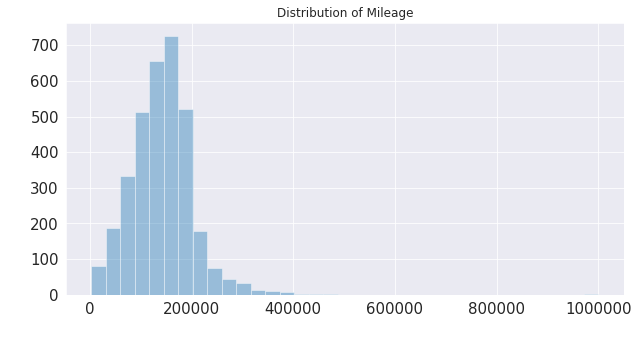

In [60]:
# what is the distribution for mileage?
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
b = sns.distplot(data["mileage"],kde=False,bins=35)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title("Distribution of Mileage")
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

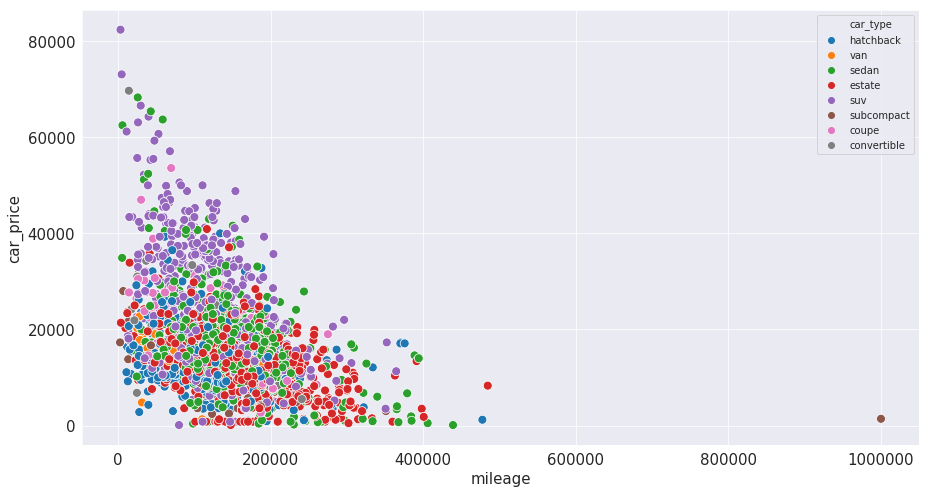

In [61]:
# how does mileage compare with car prices?
plt.figure(figsize=(15,8))
sns.scatterplot(x="mileage", y="car_price", hue="car_type",data=data, s=80)
plt.show()

In [62]:
# identify the outliers
data[data["mileage"] > 1000000]

,car_company,model_ID,mileage,engine_power,registration_date,fuel,car_paint_color,car_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,sold_date,car_price,fuel_electro,fuel_hybrid_petrol,fuel_petrol,car_paint_color_black,car_paint_color_blue,car_paint_color_brown,car_paint_color_green,car_paint_color_grey,car_paint_color_orange,car_paint_color_red,car_paint_color_silver,car_paint_color_white,car_type_coupe,car_type_estate,car_type_hatchback,car_type_sedan,car_type_subcompact,car_type_suv,car_type_van,feature1_True,feature2_True,feature3_True,feature4_True,feature5_True,feature6_True,feature7_True,feature8_True,car_series,car_series_200 Series,car_series_300 Series,car_series_400 Series,car_series_500 Series,car_series_600 Series,car_series_700 Series,car_series_Active Tourer,car_series_Gran Coupé,car_series_Gran Tourer,car_series_Gran Turismo,car_series_M Series,car_series_X Series,car_series_Z Series,car_series_i Series,duration_sold_reg,feature_total,car_model_cluster,car_model_cluster_1,car_model_cluster_2,car_model_cluster_3,car_model_cluster_4,car_model_cluster_5,car_model_cluster_6,car_model_cluster_7
15,Edureka_motors,118,1000376,90,2005-03-01,diesel,black,subcompact,True,False,False,False,False,False,True,False,2018-06-01,1400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,100 Series,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4840.0,2,3,0,0,1,0,0,0,0


In [63]:
# removing the extreme outlier
data = data.drop(data[data["mileage"] > 1000000].index,axis=0)

### Engine Power

There is a data entry error detected from the summary statistics. The minimum engine power is 0 which is not logical. We will replace it by the mean value according to the model ID and car type Typically cars with higher engine power fetches a higher value

In [64]:
# summary statistics of engine power
data["engine_power"].describe()

count    3386.000000
mean     128.893680 
std      39.362849  
min      0.000000   
25%      100.000000 
50%      120.000000 
75%      135.000000 
max      423.000000 
Name: engine_power, dtype: float64

In [65]:
data = data.drop(data[data["engine_power"] == 0].index,axis=0)

In [66]:
data[data["engine_power"] == 0]

,car_company,model_ID,mileage,engine_power,registration_date,fuel,car_paint_color,car_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,sold_date,car_price,fuel_electro,fuel_hybrid_petrol,fuel_petrol,car_paint_color_black,car_paint_color_blue,car_paint_color_brown,car_paint_color_green,car_paint_color_grey,car_paint_color_orange,car_paint_color_red,car_paint_color_silver,car_paint_color_white,car_type_coupe,car_type_estate,car_type_hatchback,car_type_sedan,car_type_subcompact,car_type_suv,car_type_van,feature1_True,feature2_True,feature3_True,feature4_True,feature5_True,feature6_True,feature7_True,feature8_True,car_series,car_series_200 Series,car_series_300 Series,car_series_400 Series,car_series_500 Series,car_series_600 Series,car_series_700 Series,car_series_Active Tourer,car_series_Gran Coupé,car_series_Gran Tourer,car_series_Gran Turismo,car_series_M Series,car_series_X Series,car_series_Z Series,car_series_i Series,duration_sold_reg,feature_total,car_model_cluster,car_model_cluster_1,car_model_cluster_2,car_model_cluster_3,car_model_cluster_4,car_model_cluster_5,car_model_cluster_6,car_model_cluster_7


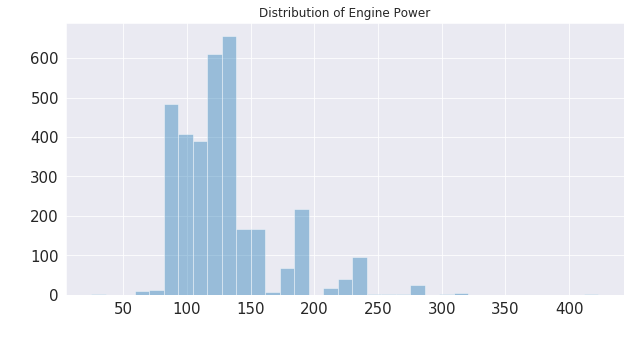

In [67]:
# what is the distribution for engine power?
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
b = sns.distplot(data["engine_power"],kde=False,bins=35)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title("Distribution of Engine Power")
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

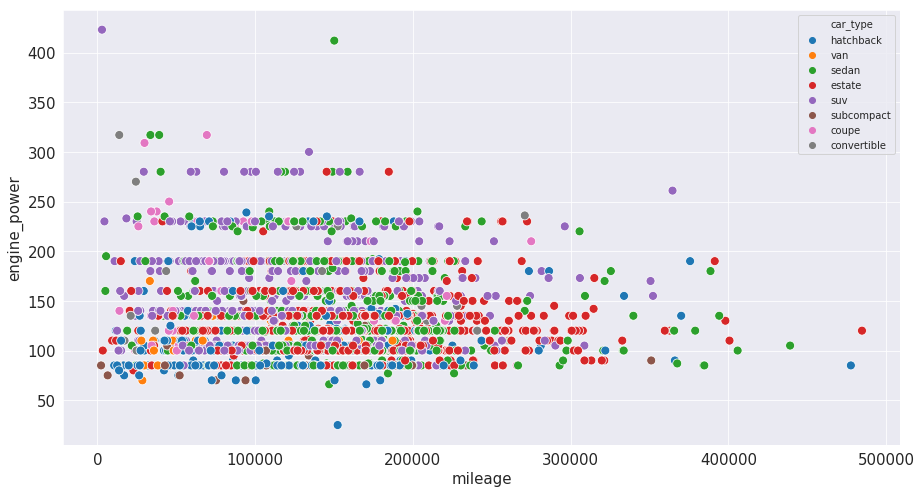

In [68]:
# how does mileage compare with engine power?
plt.figure(figsize=(15,8))
sns.scatterplot(x="mileage", y="engine_power", hue="car_type",data=data, s=80)
plt.show()

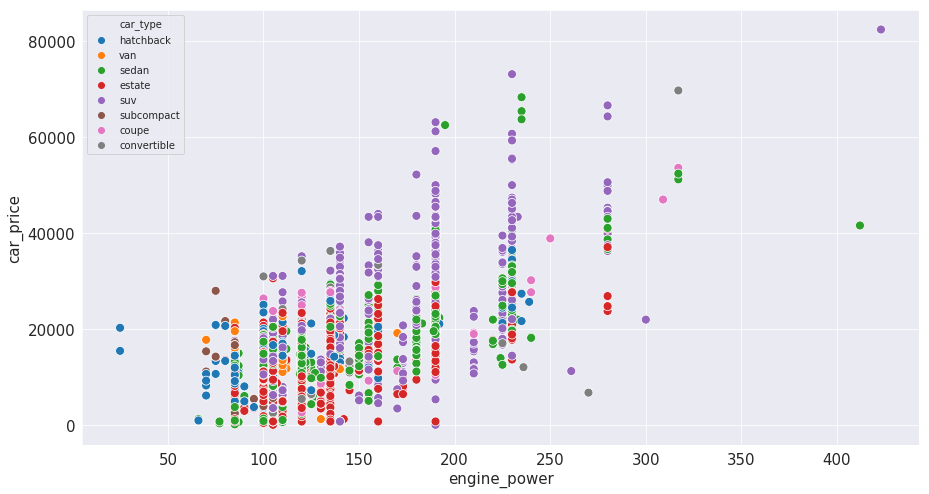

In [69]:
# how does engine power compare with car price?
plt.figure(figsize=(15,8))
sns.scatterplot(x="engine_power", y="car_price", hue="car_type",data=data, s=80)
plt.show()

In [70]:
# identifying the outliers
data[(data["mileage"] < 200000) & (data["engine_power"] > 400)]

,car_company,model_ID,mileage,engine_power,registration_date,fuel,car_paint_color,car_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,sold_date,car_price,fuel_electro,fuel_hybrid_petrol,fuel_petrol,car_paint_color_black,car_paint_color_blue,car_paint_color_brown,car_paint_color_green,car_paint_color_grey,car_paint_color_orange,car_paint_color_red,car_paint_color_silver,car_paint_color_white,car_type_coupe,car_type_estate,car_type_hatchback,car_type_sedan,car_type_subcompact,car_type_suv,car_type_van,feature1_True,feature2_True,feature3_True,feature4_True,feature5_True,feature6_True,feature7_True,feature8_True,car_series,car_series_200 Series,car_series_300 Series,car_series_400 Series,car_series_500 Series,car_series_600 Series,car_series_700 Series,car_series_Active Tourer,car_series_Gran Coupé,car_series_Gran Tourer,car_series_Gran Turismo,car_series_M Series,car_series_X Series,car_series_Z Series,car_series_i Series,duration_sold_reg,feature_total,car_model_cluster,car_model_cluster_1,car_model_cluster_2,car_model_cluster_3,car_model_cluster_4,car_model_cluster_5,car_model_cluster_6,car_model_cluster_7
1387,Edureka_motors,M5,150187,412,2012-02-01,petrol,white,sedan,True,True,True,False,True,True,True,True,2018-09-01,41600,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,1,1,1,1,M Series,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2404.0,7,1,1,0,0,0,0,0,0
3070,Edureka_motors,X6 M,2970,423,2016-04-01,petrol,red,suv,True,True,True,False,False,False,True,True,2018-04-01,82400,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,1,X Series,0,0,0,0,0,0,0,0,0,0,0,1,0,0,730.0,5,2,0,1,0,0,0,0,0


In [71]:
# removing the outliers
data = data.drop(data[(data["mileage"] < 200000) & (data["engine_power"] > 400)].index,axis=0)

### Fuel

Cars running on hybrid petrol fetches a much higher car price

In [72]:
# what are the types of fuel?
data["fuel"].value_counts()

diesel           3234
petrol           140 
hybrid_petrol    6   
electro          3   
Name: fuel, dtype: int64

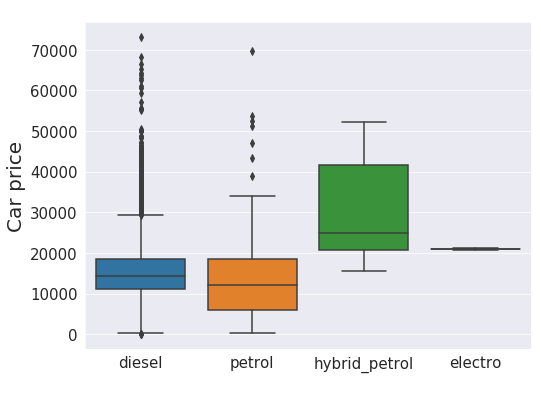

In [73]:
# how does the type of fuel compare with car price?
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
b = sns.boxplot(x="fuel", y="car_price", data=data)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title(" ")
plt.ylabel("Car price")
plt.xlabel(" ")
plt.show()

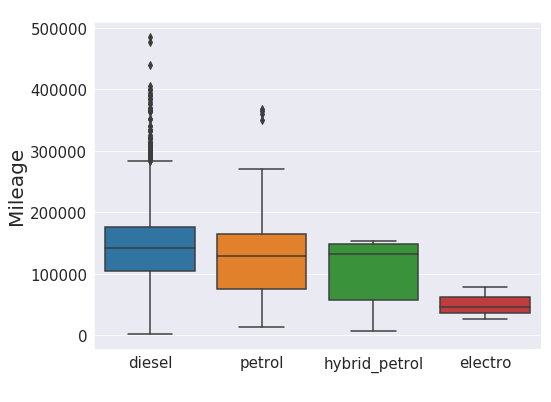

In [74]:
# how does the type of fuel compare with mileage?
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
b = sns.boxplot(x="fuel", y="mileage", data=data)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title(" ")
plt.ylabel("Mileage")
plt.xlabel(" ")
plt.show()

### Car Paint Color

In [75]:
# what are the different car paint colors?
data["car_paint_color"].value_counts()

black     1151
grey      794 
blue      505 
white     384 
silver    234 
brown     223 
red       37  
beige     36  
green     14  
orange    5   
Name: car_paint_color, dtype: int64

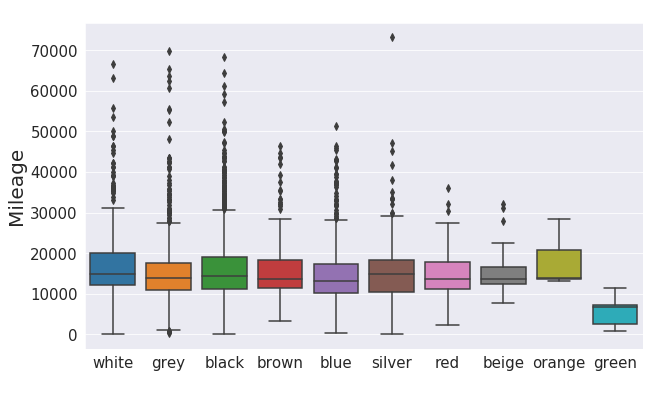

In [76]:
# how does the different car paint color compare with the car price?
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
b = sns.boxplot(x="car_paint_color", y="car_price", data=data)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title(" ")
plt.ylabel("Mileage")
plt.xlabel(" ")
plt.show()

### Features

Cars with more features fetches a higher car value and in particular, cars with feature4 are worth more

In [77]:
# breakdown of the total number of features
data["feature_total"].value_counts()

3    660
4    580
5    543
2    466
6    420
1    314
7    274
8    64 
0    62 
Name: feature_total, dtype: int64

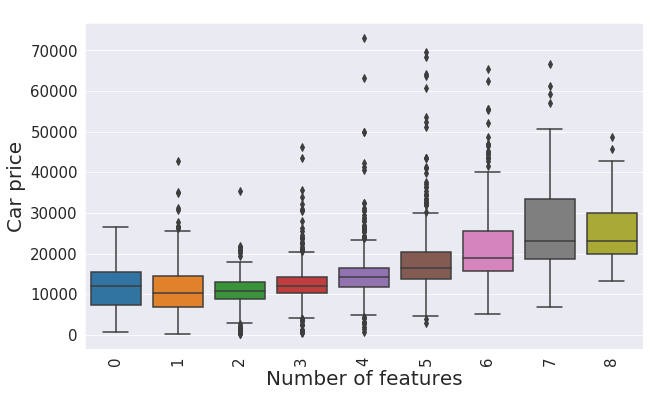

In [78]:
# how does the total number of feature compare with the car prices?
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
b = sns.boxplot(x="feature_total", y="car_price", data=data)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title(" ")
plt.ylabel("Car price")
plt.xlabel("Number of features")
plt.xticks(rotation=90)
plt.show()

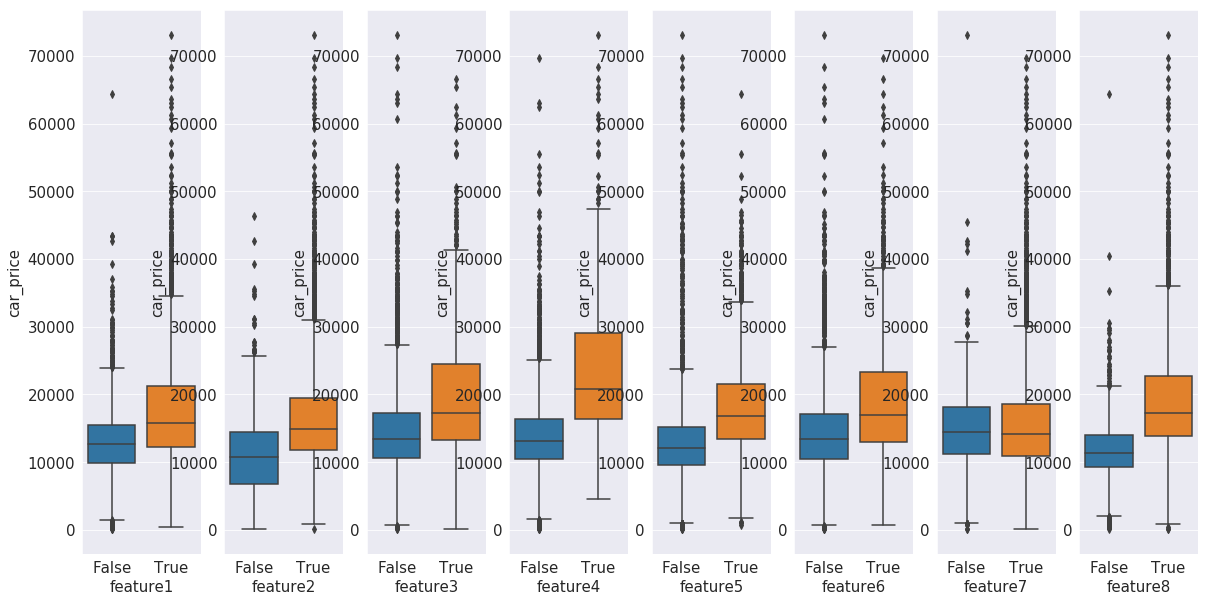

In [79]:
# how does having certain feature affect the car price?
f, axes = plt.subplots(1, 8)
sns.boxplot(x="feature1", y="car_price",data=data,  orient='v' , ax=axes[0])
sns.boxplot(x="feature2", y="car_price",data=data,  orient='v' , ax=axes[1])
sns.boxplot(x="feature3", y="car_price",data=data,  orient='v' , ax=axes[2])
sns.boxplot(x="feature4", y="car_price",data=data,  orient='v' , ax=axes[3])
sns.boxplot(x="feature5", y="car_price",data=data,  orient='v' , ax=axes[4])
sns.boxplot(x="feature6", y="car_price",data=data,  orient='v' , ax=axes[5])
sns.boxplot(x="feature7", y="car_price",data=data,  orient='v' , ax=axes[6])
sns.boxplot(x="feature8", y="car_price",data=data,  orient='v' , ax=axes[7])
plt.show()

### Duration of car ownership

Price of car gets lower as time goes by

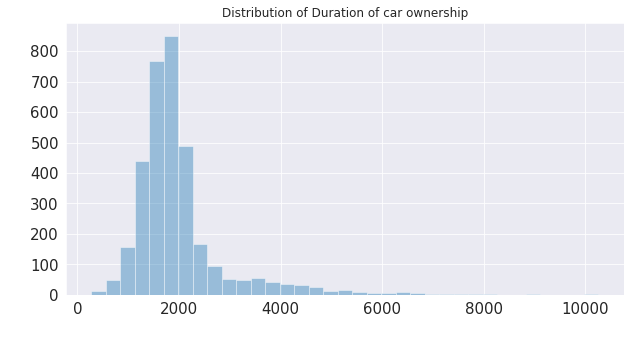

In [80]:
# what is the distribution for duration of car ownership?
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
b = sns.distplot(data["duration_sold_reg"],kde=False,bins=35)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title("Distribution of Duration of car ownership")
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

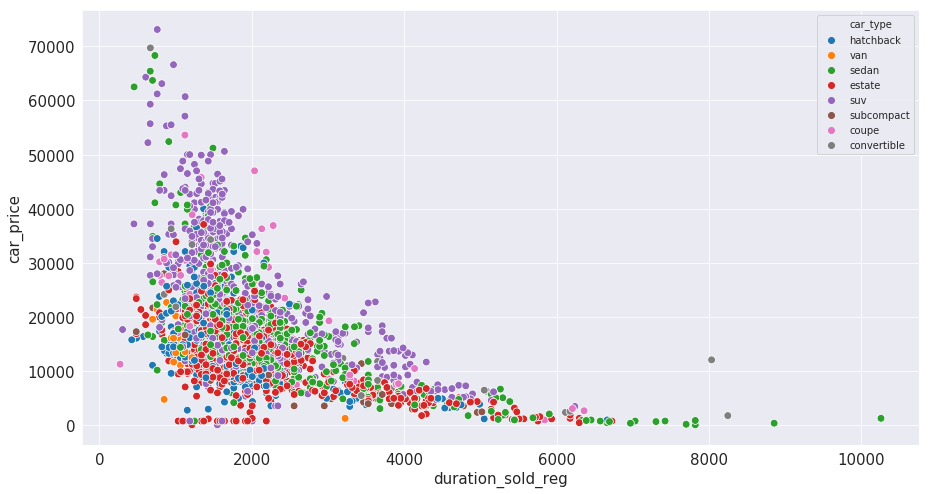

In [81]:
# how does the duration of car ownership compare with the car price?
plt.figure(figsize=(15,8))
sns.scatterplot(x="duration_sold_reg", y="car_price", hue="car_type",data=data, s=60)
plt.show()

In [82]:
# identify the extreme outliers
data[data["duration_sold_reg"] > 10000]

,car_company,model_ID,mileage,engine_power,registration_date,fuel,car_paint_color,car_type,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,sold_date,car_price,fuel_electro,fuel_hybrid_petrol,fuel_petrol,car_paint_color_black,car_paint_color_blue,car_paint_color_brown,car_paint_color_green,car_paint_color_grey,car_paint_color_orange,car_paint_color_red,car_paint_color_silver,car_paint_color_white,car_type_coupe,car_type_estate,car_type_hatchback,car_type_sedan,car_type_subcompact,car_type_suv,car_type_van,feature1_True,feature2_True,feature3_True,feature4_True,feature5_True,feature6_True,feature7_True,feature8_True,car_series,car_series_200 Series,car_series_300 Series,car_series_400 Series,car_series_500 Series,car_series_600 Series,car_series_700 Series,car_series_Active Tourer,car_series_Gran Coupé,car_series_Gran Tourer,car_series_Gran Turismo,car_series_M Series,car_series_X Series,car_series_Z Series,car_series_i Series,duration_sold_reg,feature_total,car_model_cluster,car_model_cluster_1,car_model_cluster_2,car_model_cluster_3,car_model_cluster_4,car_model_cluster_5,car_model_cluster_6,car_model_cluster_7
228,Edureka_motors,316,146951,66,1990-03-01,petrol,white,sedan,False,False,False,False,False,False,False,False,2018-04-01,1300,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,300 Series,0,1,0,0,0,0,0,0,0,0,0,0,0,0,10258.0,0,7,0,0,0,0,0,0,1


In [83]:
# removing the extreme outlier
data = data.drop(data[data["duration_sold_reg"] > 10000].index,axis=0)

In [84]:
data = data.reset_index().drop("index",axis=1)

### Distribution Transform

#### Car Price

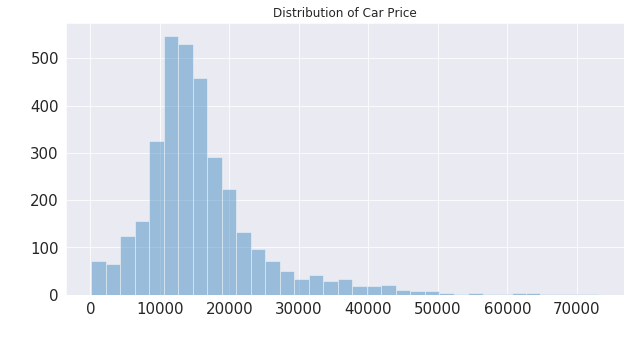

In [85]:
# what is the distribution for mileage after removing outlier
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
b = sns.distplot(data["car_price"],kde=False,bins=35)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title("Distribution of Car Price")
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

In [86]:
# skewness
print("The skewness of car price is {}".format(data['car_price'].skew()))

The skewness of car price is 1.8194713798341562


Skewness is 0.38706724190850633


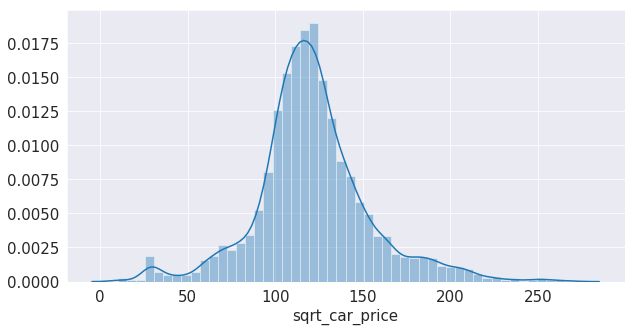

In [87]:
# now transforming the target variable by square roorting it
data['sqrt_car_price'] = np.sqrt(data['car_price'])
print ('Skewness is', data['sqrt_car_price'].skew())
plt.figure(figsize=(10,5))
sns.distplot(data['sqrt_car_price'])

#### Mileage

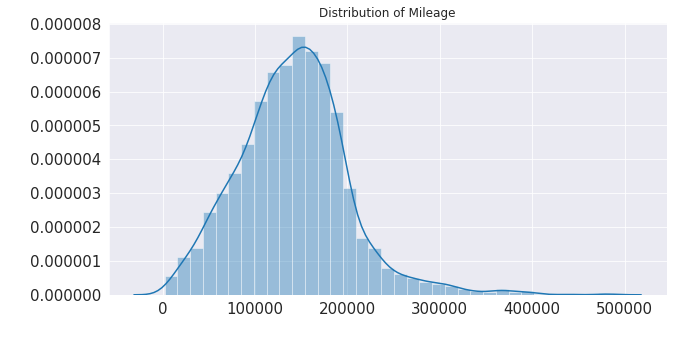

In [88]:
# what is the distribution for mileage after removing outlier
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
b = sns.distplot(data["mileage"],kde=True,bins=35)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title("Distribution of Mileage")
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

In [89]:
# skewness
print("The skewness of mileage is {}".format(data["mileage"].skew()))

The skewness of mileage is 0.670035155632298


#### Engine Power

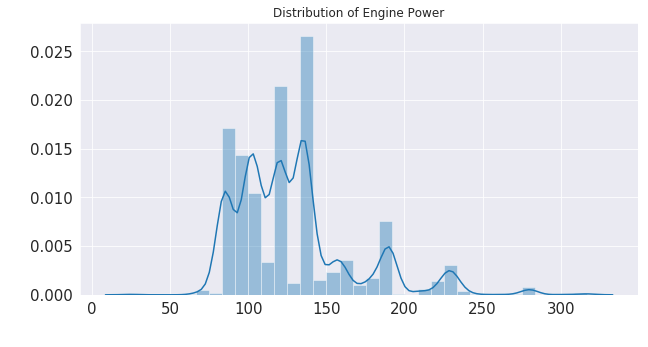

In [90]:
# what is the distribution for engine power after removing outlier
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
b = sns.distplot(data["engine_power"],kde=True,bins=35)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title("Distribution of Engine Power")
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

In [91]:
# skewness
print("The skewness of engine power is {}".format(data["engine_power"].skew()))

The skewness of engine power is 1.4165823808306548


Skewness is 0.5085273039445585


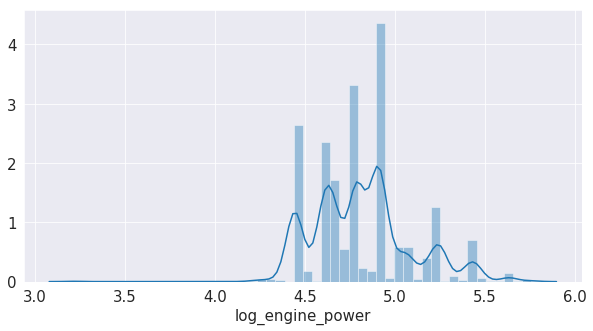

In [92]:
# now transforming the target variable by logging it
data["log_engine_power"] = np.log(data['engine_power'])
print ('Skewness is', data["log_engine_power"].skew())
plt.figure(figsize=(10,5))
sns.distplot(data["log_engine_power"])

#### Duration of car ownership

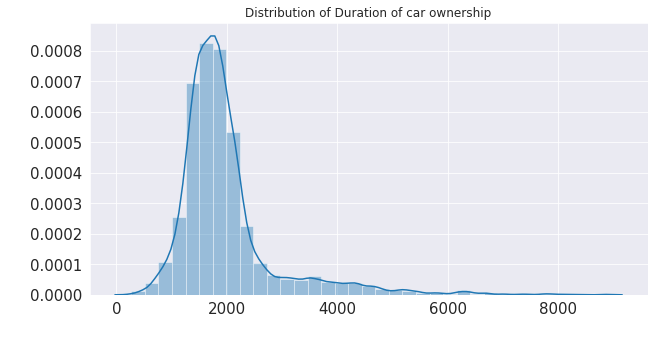

In [93]:
# what is the distribution for duration of car ownership?
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
b = sns.distplot(data["duration_sold_reg"],kde=True,bins=35)
b.axes.set_title("Title",fontsize=30)
b.set_xlabel("X Label",fontsize=20)
b.set_ylabel("Y Label",fontsize=20)
b.tick_params(labelsize=15)
plt.title("Distribution of Duration of car ownership")
plt.ylabel(" ")
plt.xlabel(" ")
plt.show()

In [94]:
# skewness
print("The skewness of duration of car ownership is {}".format(data["duration_sold_reg"].skew()))

The skewness of duration of car ownership is 2.5759688607063


Skewness is 0.579529023555013


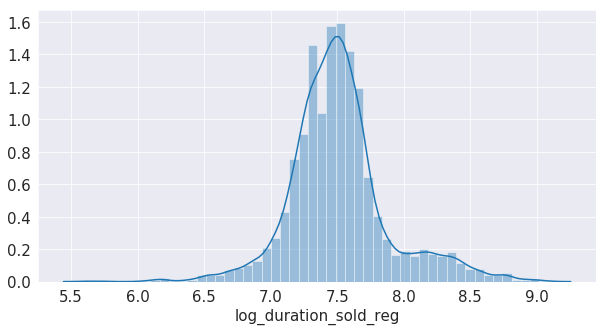

In [95]:
# now transforming the target variable by logging it
data["log_duration_sold_reg"] = np.log(data['duration_sold_reg'])
print ('Skewness is', data["log_duration_sold_reg"].skew())
plt.figure(figsize=(10,5))
sns.distplot(data["log_duration_sold_reg"])

### Correlation Plot

There is a positive correlation between suv and X series. Hence we will remove one of these features to avoid multicollinearity. We will remove X series.

In [96]:
data.shape

(3382, 73)

In [97]:
features = data.loc[:,['mileage', 'log_engine_power', 'car_paint_color','fuel_electro',
       'fuel_hybrid_petrol', 'fuel_petrol', 'car_type_coupe',
       'car_type_estate', 'car_type_hatchback', 'car_type_sedan',
       'car_type_subcompact', 'car_type_suv', 'car_type_van', 'feature1_True',
       'feature2_True', 'feature3_True', 'feature4_True', 'feature5_True',
       'feature6_True', 'feature7_True', 'feature8_True', 'car_series_200 Series',
       'car_series_300 Series', 'car_series_400 Series',
       'car_series_500 Series', 'car_series_600 Series',
       'car_series_700 Series', 'car_series_Active Tourer',
       'car_series_Gran Coupé', 'car_series_Gran Tourer',
       'car_series_Gran Turismo', 'car_series_M Series', 'car_series_X Series',
       'car_series_Z Series', 'car_series_i Series','log_duration_sold_reg',
       'feature_total', 'car_price']]

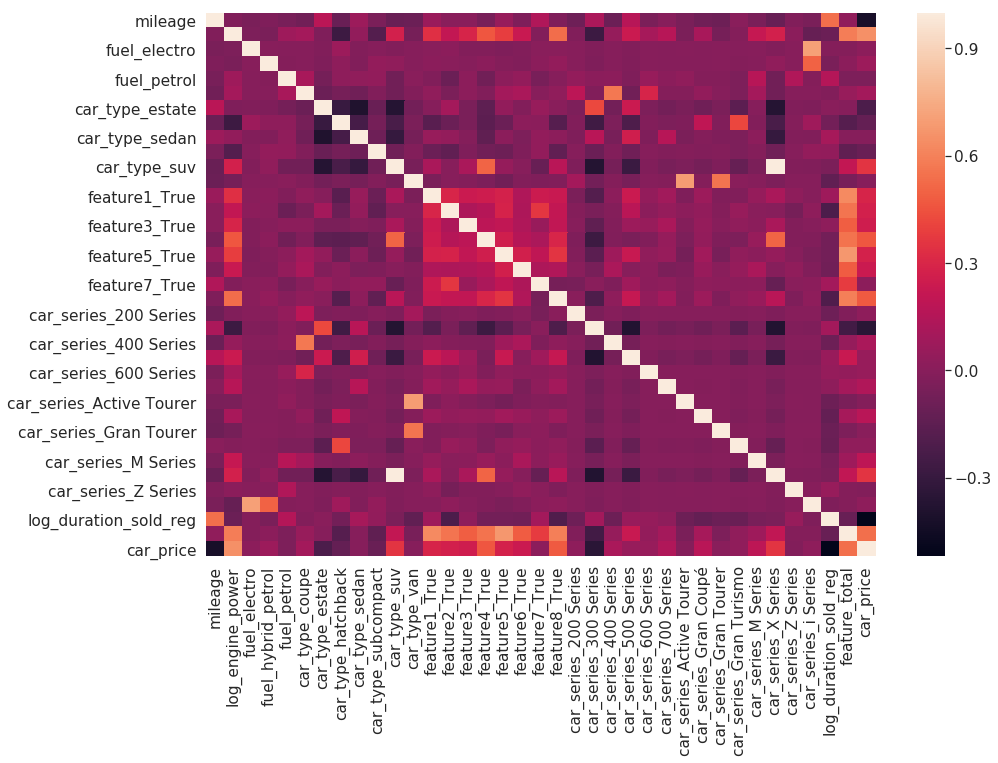

In [98]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)
sns.heatmap(features.corr())

In [99]:
corr_matrix = features.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
print(sol)

car_type_suv              car_series_X Series         0.994836
fuel_electro              car_series_i Series         0.706793
car_type_van              car_series_Active Tourer    0.695066
feature5_True             feature_total               0.676541
log_engine_power          car_price                   0.650764
feature1_True             feature_total               0.628726
feature8_True             feature_total               0.592071
log_engine_power          feature_total               0.587173
car_type_coupe            car_series_400 Series       0.571421
feature2_True             feature_total               0.560774
car_type_van              car_series_Gran Tourer      0.558613
feature4_True             feature_total               0.550357
mileage                   log_duration_sold_reg       0.540202
feature_total             car_price                   0.540079
log_engine_power          feature8_True               0.535352
log_duration_sold_reg     car_price                   0

## 5. Data Modelling

### Splitting into training and testing set

In our final training set, we will exclude variables that does not have any significant impact on the car prices as well as the original categorical variables before they were encoded. This is so as to avoid the multi-collinearity issues.

In [100]:
data.columns

Index(['car_company', 'model_ID', 'mileage', 'engine_power',
       'registration_date', 'fuel', 'car_paint_color', 'car_type', 'feature1',
       'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7',
       'feature8', 'sold_date', 'car_price', 'fuel_electro',
       'fuel_hybrid_petrol', 'fuel_petrol', 'car_paint_color_black',
       'car_paint_color_blue', 'car_paint_color_brown',
       'car_paint_color_green', 'car_paint_color_grey',
       'car_paint_color_orange', 'car_paint_color_red',
       'car_paint_color_silver', 'car_paint_color_white', 'car_type_coupe',
       'car_type_estate', 'car_type_hatchback', 'car_type_sedan',
       'car_type_subcompact', 'car_type_suv', 'car_type_van', 'feature1_True',
       'feature2_True', 'feature3_True', 'feature4_True', 'feature5_True',
       'feature6_True', 'feature7_True', 'feature8_True', 'car_series',
       'car_series_200 Series', 'car_series_300 Series',
       'car_series_400 Series', 'car_series_500 Series',
 

In [101]:
X = data.loc[:,['mileage', 'log_engine_power', 'car_paint_color_black',
       'car_paint_color_blue', 'car_paint_color_brown',
       'car_paint_color_green', 'car_paint_color_grey',
       'car_paint_color_orange', 'car_paint_color_red',
       'car_paint_color_silver', 'car_paint_color_white','fuel_electro',
       'fuel_hybrid_petrol', 'fuel_petrol', 'car_type_coupe',
       'car_type_estate', 'car_type_hatchback', 'car_type_sedan',
       'car_type_subcompact', 'car_type_suv', 'car_type_van', 'feature1_True',
       'feature2_True', 'feature3_True', 'feature4_True', 'feature5_True',
       'feature6_True', 'feature7_True', 'feature8_True', 'car_series_200 Series',
       'car_series_300 Series', 'car_series_400 Series',
       'car_series_500 Series', 'car_series_600 Series',
       'car_series_700 Series', 'car_series_Active Tourer',
       'car_series_Gran Coupé', 'car_series_Gran Tourer',
       'car_series_Gran Turismo', 'car_series_M Series',
       'car_series_Z Series', 'car_series_i Series', 'log_duration_sold_reg',
       'feature_total']]

In [102]:
y = data.loc[:,["sqrt_car_price"]].values

In [103]:
# split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [104]:
X_train.shape

(2705, 44)

In [105]:
y_train.shape

(2705, 1)

In [106]:
X_test.shape

(677, 44)

In [107]:
y_test.shape

(677, 1)

### Standardizing

In [108]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

### Defining our evaluation metric

Since this is a regression problem, we will be using the root mean square error as my evaluation metric.

### Multiple Linear Regression

[120.9052504]
[[-7.28949304e+00  1.13634415e+01 -1.48895541e-01 -1.56085415e+00
   2.77204341e-01 -1.12606631e+00  1.92507653e-01 -2.39984413e-02
   1.18350757e-02 -6.11666137e-01  1.70542881e-01 -6.26866131e-01
   7.68889408e-01 -1.40417792e+00 -7.83242884e-01 -4.07935590e+00
  -1.39862571e+00  2.37061853e-01 -2.54226082e-01  3.63368767e+00
  -2.35889538e+00  4.06852536e+12  3.30659282e+12  3.25502519e+12
   3.24582146e+12  4.07120504e+12  3.51326391e+12  2.05751462e+12
   4.07671583e+12  1.11735052e-01  3.98914223e-02  2.24728113e+00
   2.62769611e+00  6.81338611e-01  1.62841956e+00  1.24468043e+00
   1.66918140e+00  7.93624057e-01  1.53138128e+00  1.42773701e+00
   1.74811747e-01  2.04969352e+00 -1.19813970e+01 -1.54552355e+13]]
RMSE of Multiple Linear Regression is 13.549661522849231
Coefficient of determination R^2 of the prediction is: 0.8140514732305479


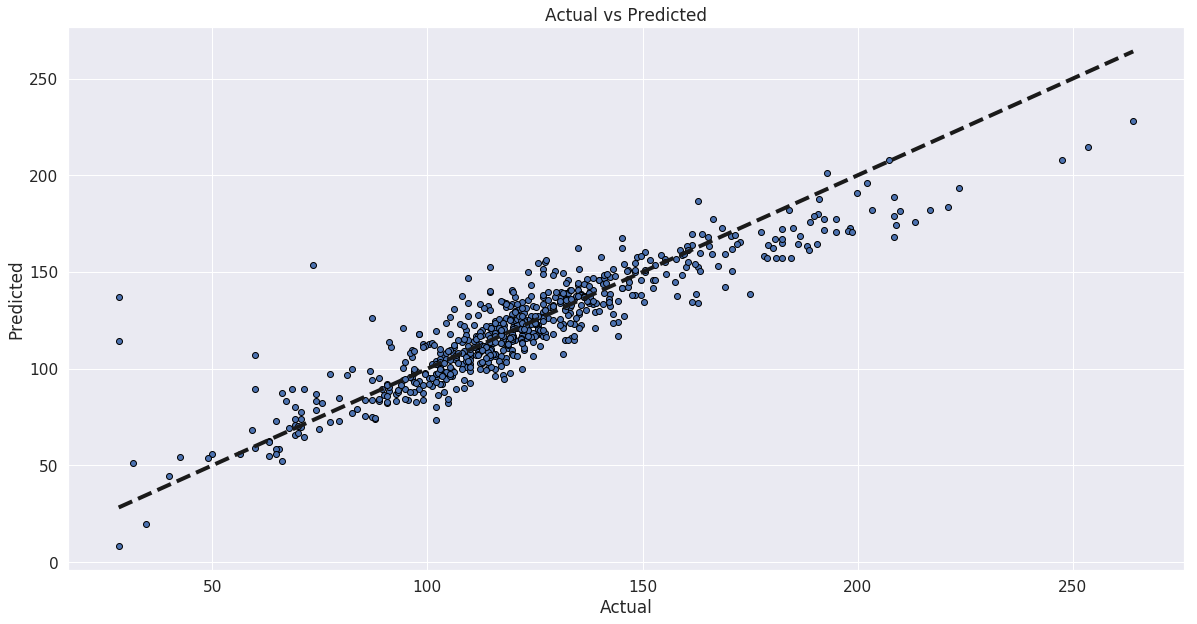

In [109]:
# CREATE THE INSTANCE
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
print(lm.intercept_)
print(lm.coef_)

# PREDICT
predictions_lm = lm.predict(X_test_scaled)

# EVALUATE
acc_mle = np.sqrt(metrics.mean_squared_error(y_test, predictions_lm))
r2_mle = r2_score(y_test, predictions_lm)
print("RMSE of Multiple Linear Regression is {}".format(acc_mle))
print("Coefficient of determination R^2 of the prediction is: {}".format(r2_mle))

from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
ax.scatter(y_test, predictions_lm, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [110]:
X_train_scaled.shape

(2705, 44)

In [111]:
# FINDING THE OPTIMAL NUMBER OF FEATURES
no_features_list = np.arange(1,44)
high_score = 0
no_features = 0

score_list = []
for i in range(len(no_features_list)):
    model = LinearRegression()
    rfe = RFE(model, no_features_list[i])
    X_train_scaled_rfe = rfe.fit_transform(X_train_scaled, y_train)
    X_test_scaled_rfe = rfe.transform(X_test_scaled)
    model.fit(X_train_scaled_rfe, y_train)
    score = model.score(X_test_scaled_rfe, y_test)
    score_list.append(score)
    
    if(score > high_score):
        high_score = score
        no_features = no_features_list[i]

print("Optimum number of features is : %d" %no_features)
print("Score with %d features: %f" %(no_features, high_score))

Optimum number of features is : 26
Score with 26 features: 0.816083


In [112]:
# FEATURE IMPORTANCE (Recursive Feature Elimination)
cols = list(X_train.columns)
model = LinearRegression()
rfe = RFE(model, 26)
X_rfe = rfe.fit_transform(X_train_scaled, y_train)
model.fit(X_rfe, y_train)
temp = pd.Series(rfe.support_, index=cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['mileage', 'log_engine_power', 'car_paint_color_blue',
       'car_paint_color_green', 'fuel_petrol', 'car_type_estate',
       'car_type_hatchback', 'car_type_suv', 'car_type_van', 'feature1_True',
       'feature2_True', 'feature3_True', 'feature4_True', 'feature5_True',
       'feature6_True', 'feature7_True', 'feature8_True',
       'car_series_400 Series', 'car_series_500 Series',
       'car_series_700 Series', 'car_series_Gran Coupé',
       'car_series_Gran Turismo', 'car_series_M Series', 'car_series_i Series',
       'log_duration_sold_reg', 'feature_total'],
      dtype='object')


In [113]:
rfe_X = data.loc[:,['mileage', 'log_engine_power', 'car_paint_color_blue',
       'car_paint_color_green', 'fuel_petrol', 'car_type_estate',
       'car_type_hatchback', 'car_type_suv', 'car_type_van', 'feature1_True',
       'feature2_True', 'feature3_True', 'feature4_True', 'feature5_True',
       'feature6_True', 'feature7_True', 'feature8_True',
       'car_series_400 Series', 'car_series_500 Series',
       'car_series_700 Series', 'car_series_Gran Coupé',
       'car_series_Gran Turismo', 'car_series_M Series', 'car_series_i Series',
       'log_duration_sold_reg', 'feature_total']]

y = data.loc[:,["sqrt_car_price"]].values

# split into training and testing set
rfe_X_train, rfe_X_test, y_train, y_test = train_test_split(rfe_X, y, test_size=0.2, random_state=101)

# standardizing
sc = StandardScaler()
rfe_X_train_scaled = sc.fit_transform(rfe_X_train)
rfe_X_test_scaled = sc.transform(rfe_X_test)

[120.9056125]
[[-7.28332097e+00  1.13321700e+01 -1.53860093e+00 -1.14364665e+00
  -1.39534201e+00 -4.25649730e+00 -1.50111597e+00  3.53613350e+00
  -1.12073095e+00  1.02713153e+13  8.34775608e+12  8.21756952e+12
   8.19433396e+12  1.02780803e+13  8.86951367e+12  5.19435902e+12
   1.02919928e+13  1.71867667e+00  2.63853248e+00  1.63836251e+00
   1.59764409e+00  1.46272934e+00  1.33850098e+00  1.95813022e+00
  -1.21367654e+01 -3.90179690e+13]]
RMSE of Multiple Linear Regression is 13.47543340460419
Coefficient of determination R^2 of the prediction is: 0.8160832291231574


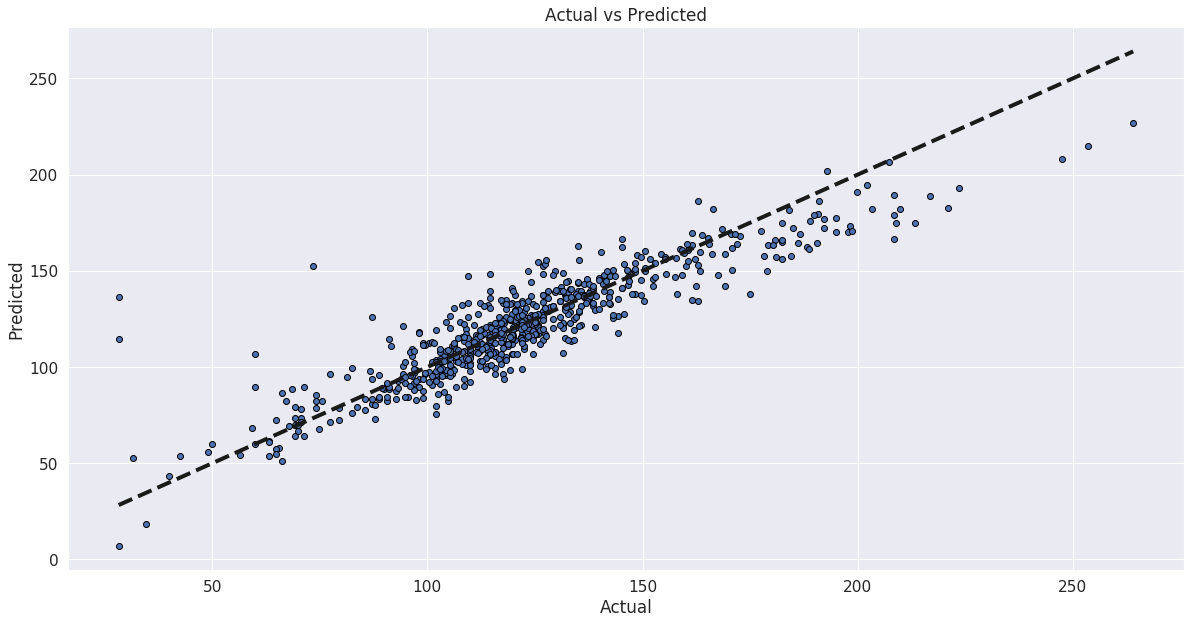

In [114]:
# CREATE THE INSTANCE
lm = LinearRegression()
lm.fit(rfe_X_train_scaled, y_train)
print(lm.intercept_)
print(lm.coef_)

# PREDICT
predictions_rfe_lm = lm.predict(rfe_X_test_scaled)

# EVALUATE
acc_mle = np.sqrt(metrics.mean_squared_error(y_test, predictions_rfe_lm))
r2_mle = r2_score(y_test, predictions_rfe_lm)
print("RMSE of Multiple Linear Regression is {}".format(acc_mle))
print("Coefficient of determination R^2 of the prediction is: {}".format(r2_mle))

from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
ax.scatter(y_test, predictions_rfe_lm, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

To reduce overfitting, we perform regularization methods

### Ridge Regression

In [115]:
##### BASELINE MODEL #####

In [116]:
# FIT MODEL TO TRAINING SET
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

# PREDICTION
predictions = ridge.predict(X_test_scaled)

# EVALUATE
print("RMSE of Ridge Regression is {}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
print("Coefficient of determination R^2 of the prediction is: {}".format(r2_score(y_test, predictions)))

RMSE of Ridge Regression is 13.549607354608991
Coefficient of determination R^2 of the prediction is: 0.814052959981242


In [117]:
# GRID SEARCH PARAMETER TUNING
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]
# create and fit a ridge regression model, testing each alpha
model_ridge = Ridge()
grid = GridSearchCV(estimator = model_ridge, 
                    param_grid = dict(alpha=alphas), 
                    cv=5)

grid.fit(X_train_scaled, y_train)
print(grid.best_estimator_)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [118]:
##### BEST PARAMETERS MODEL #####

RMSE of Ridge Regression is 13.554893682482028
Coefficient of determination R^2 of the prediction is: 0.8139078386139277


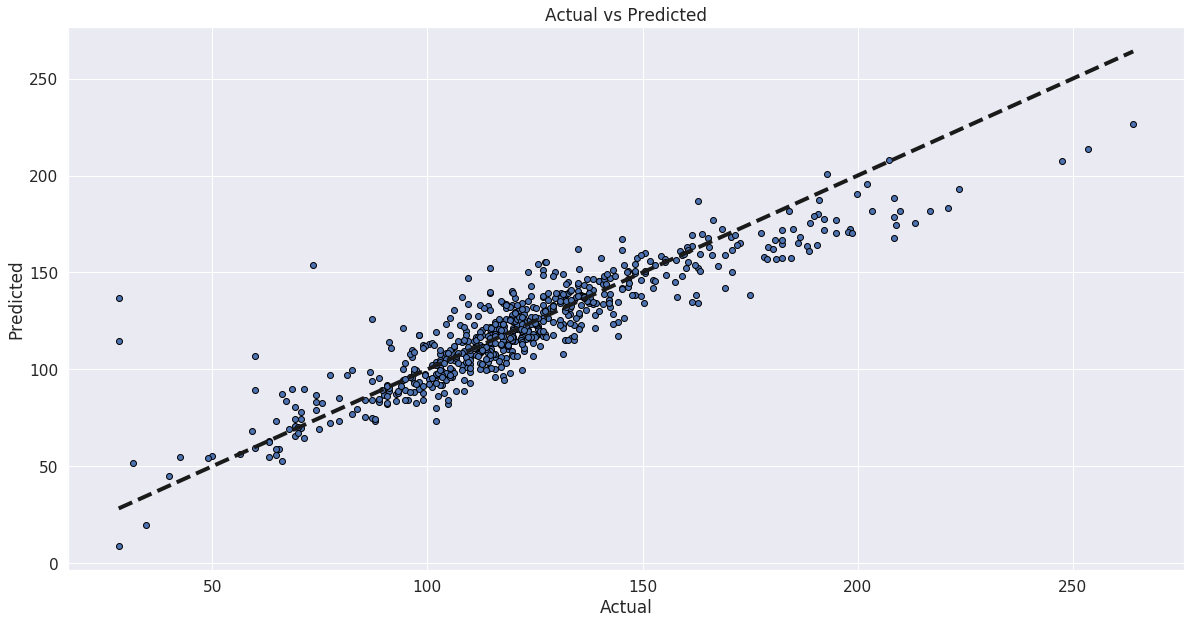

In [119]:
# FIT MODEL TO TRAINING SET
model_ridge = Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
                    normalize=False, random_state=None, solver='auto', tol=0.001) #paramters tuned using GridSearchCV
model_ridge.fit(X_train_scaled, y_train)

# PREDICTIONS
predictions_ridge = model_ridge.predict(X_test_scaled)

# EVALUATE
acc_ridge = np.sqrt(metrics.mean_squared_error(y_test, predictions_ridge))
r2_ridge = r2_score(y_test, predictions_ridge)
print("RMSE of Ridge Regression is {}".format(acc_ridge))
print("Coefficient of determination R^2 of the prediction is: {}".format(r2_ridge))

from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
ax.scatter(y_test, predictions_ridge, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

### LASSO

Difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are completely neglected. So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.

In [120]:
##### BASELINE MODEL ####

In [121]:
# FITTING THE MODEL
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
predictions = lasso.predict(X_test_scaled)
print("RMSE of Lasso is {}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
print("Coefficient of determination R^2 of the prediction is: {}".format(r2_score(y_test, predictions)))

RMSE of Lasso is 13.96955394000977
Coefficient of determination R^2 of the prediction is: 0.8023481303421754


In [122]:
# GRID SEARCH PARAMETER TUNING
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]

# create and fit a ridge regression model, testing each alpha
model_lasso = Lasso()
grid = GridSearchCV(estimator=model_lasso, param_grid=dict(alpha=alphas), cv=5, n_jobs=-1)
grid.fit(X_train_scaled, y_train)
print(grid.best_estimator_)

Lasso(alpha=1e-15, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [123]:
##### BEST PARAMETERS MODEL #####

RMSE of Lasso is 13.546342999514417
Coefficient of determination R^2 of the prediction is: 0.8141425454626524


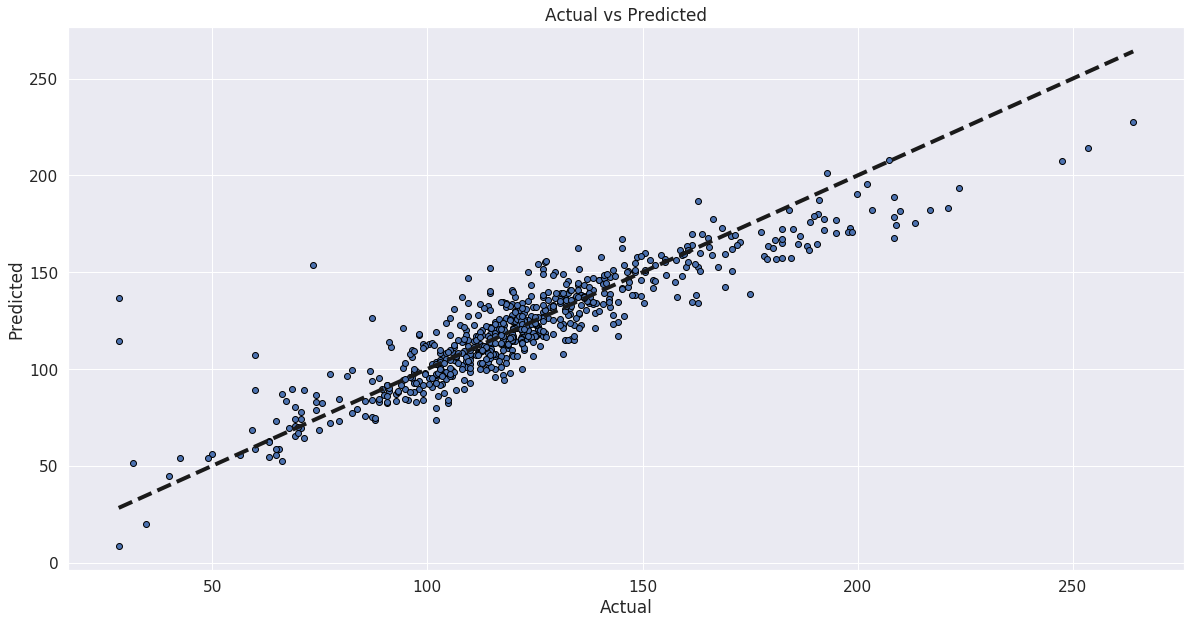

In [124]:
# FIT BEST MODEL
lasso = Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
               normalize=False, positive=False, precompute=False, random_state=None,
               selection='cyclic', tol=0.0001, warm_start=False)
lasso.fit(X_train_scaled, y_train)

# PREDICTION
predictions_lasso = lasso.predict(X_test_scaled)

# EVALUATE
acc_lasso = np.sqrt(metrics.mean_squared_error(y_test, predictions_lasso))
r2_lasso = r2_score(y_test, predictions_lasso)
print("RMSE of Lasso is {}".format(acc_lasso))
print("Coefficient of determination R^2 of the prediction is: {}".format(r2_lasso))

from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
ax.scatter(y_test, predictions_lasso, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

### Random Forest Regressor

n_estimators: number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably.   

max_depth: the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data.   

min_samples_split: the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, each tree in the forest becomes more constrained as it has to consider more samples at each node.

min_samples_leaf : the minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.   

max_features: the number of features to consider when looking for the best split.






In [125]:
##### BASELINE MODEL #####

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': -1, 'oob_score': False, 'random_state': 101, 'verbose': 0, 'warm_start': False}
RMSE of Random Forest is 12.360877888471896
Coefficient of determination R^2 of the prediction is: 0.8452486375880233


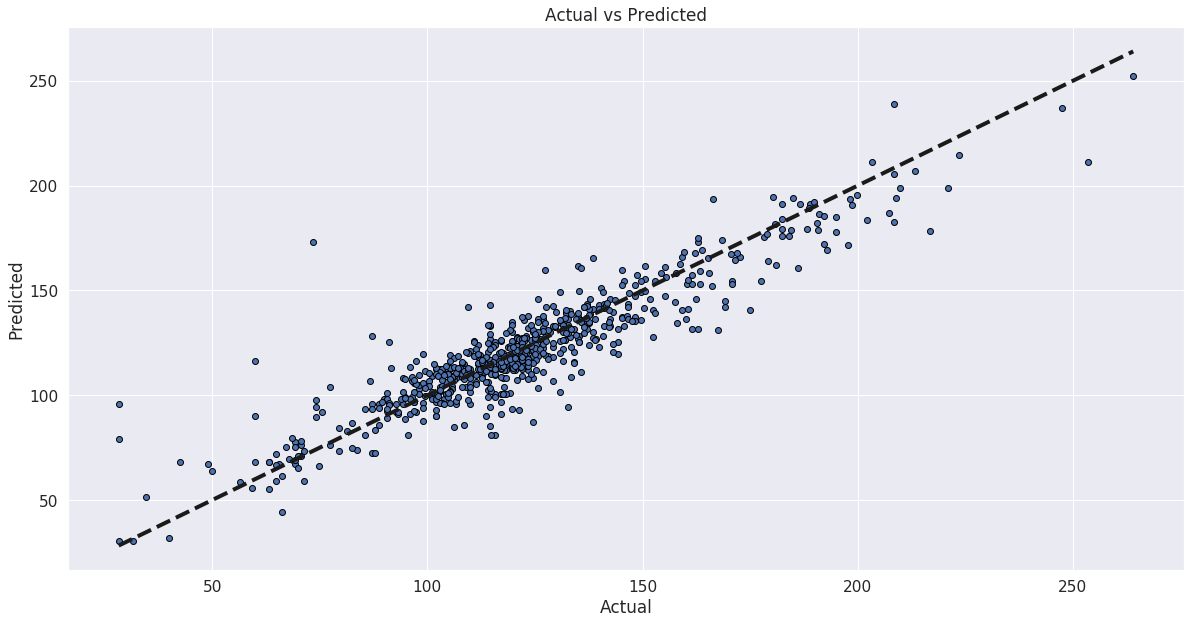

In [126]:
# FIT THE TRAINING SET
randomforest = RandomForestRegressor(random_state=101, n_jobs=-1)
model_forest = randomforest.fit(X_train_scaled, y_train)
print(model_forest.get_params())

# PREDICT
predictions = model_forest.predict(X_test_scaled)

# EVALUATE
print("RMSE of Random Forest is {}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
print("Coefficient of determination R^2 of the prediction is: {}".format(r2_score(y_test, predictions)))

from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
ax.scatter(y_test, predictions, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [127]:
##### CREATING A RANDOM HYPERPARAMETER GRID #####

In [128]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [129]:
# FITTING THE MODEL TO LOOK FOR BEST HYPERPARAMETERS

In [130]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=1, random_state=101, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 72 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 306 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=101, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [131]:
best_random = rf_random.best_estimator_
print(best_random)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=70,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [1516]:
##### BEST PARAMETERS MODEL #####

In [1573]:
X_train_scaled.shape

(2705, 44)

In [ ]:
best_randomforest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=110,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

RMSE of Random Forest is 11.706099525517843
Coefficient of determination R^2 of the prediction is: 0.8612093296701364


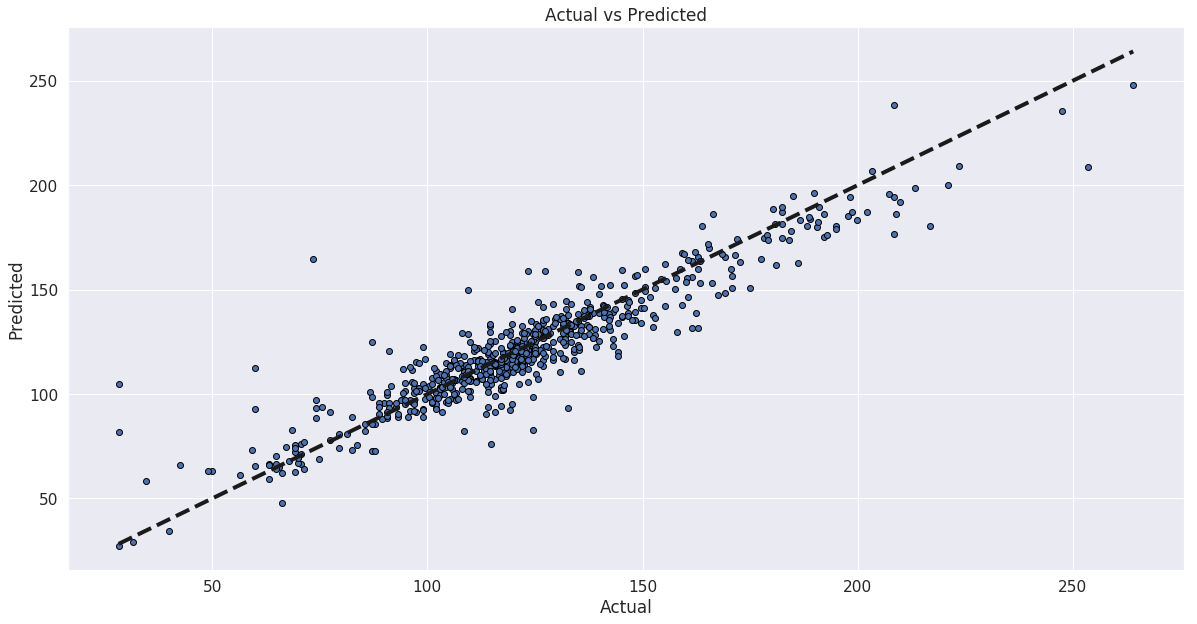

In [133]:
# FITTING THE MODEL
best_randomforest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=110,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

best_rf = best_randomforest.fit(X_train_scaled, y_train)

# PREDICT
predictions_rf = best_rf.predict(X_test_scaled)

# EVALUATE
acc_rf = np.sqrt(metrics.mean_squared_error(y_test, predictions_rf))
r2_rf = r2_score(y_test, predictions_rf)
print("RMSE of Random Forest is {}".format(acc_rf))
print("Coefficient of determination R^2 of the prediction is: {}".format(r2_rf))

from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
ax.scatter(y_test, predictions_rf, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

### XGBoost

In [1519]:
##### BASELINE MODEL #####

RMSE of XGBoost is 12.178456524375026
Coefficient of determination R^2 of the prediction is: 0.8497825625379191


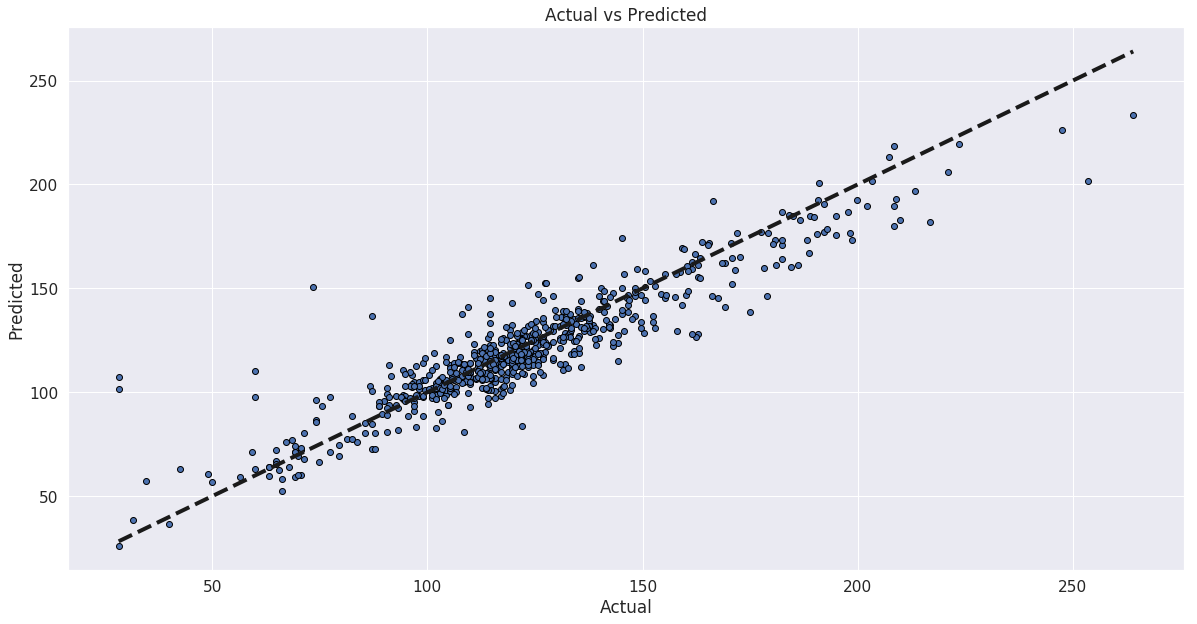

In [134]:
# FITTING THE MODEL
regr = xgb.XGBRegressor()
regr.fit(X_train_scaled, y_train)

# PREDICTIONS
predictions = regr.predict(X_test_scaled)

# EVALUATION
print("RMSE of XGBoost is {}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
print("Coefficient of determination R^2 of the prediction is: {}".format(r2_score(y_test, predictions)))

fig, ax = plt.subplots()
ax.scatter(y_test, predictions, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [1521]:
# # FITTING THE MODEL TO LOOK FOR BEST HYPERPARAMETERS #

In [135]:
hyperparameters = {"colsample_bytree": [0.4, 0.5, 0.6, 0.7, 1.0],
                  "gamma": [0.5, 0.8, 1.0, 1.1, 1.2, 1.3],
                  "learning_rate": [0.01, 0.05, 0.1, 0.2],
                  "max_depth": [5, 6, 7, 8, 9, 10, 11],
                  "min_child_weight": [2, 3, 4, 5, 6],
                  "n_estimators": [500, 1000, 1500, 2000],
                  "reg_alpha":[1.0, 1.5, 2.0, 2.5, 3.0],
                  "reg_lamda":[0.1, 0.2, 0.3, 0.4, 1.0],
                  "subsample":[0.5, 0.55, 0.6, 0.65, 0.7, 1.0]}

In [136]:
rfc = xgb.XGBRegressor()
random_search = RandomizedSearchCV(rfc, n_jobs=-1, 
                                   param_distributions=hyperparameters,
                                   n_iter=100)
start = time.time()
random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 1.0], 'gamma': [0.5, 0.8, 1.0, 1.1, 1.2, 1.3], 'learning_rate': [0.01, 0.05, 0.1, 0.2], 'max_depth': [5, 6, 7, 8, 9, 10, 11], 'min_child_weight': [2, 3, 4, 5, 6], 'n_estimators': [500, 1000, 1500, 2000], 'reg_alpha': [1.0, 1.5, 2.0, 2.5, 3.0], 'reg_lamda': [0.1, 0.2, 0.3, 0.4, 1.0], 'subsample': [0.5, 0.55, 0.6, 0.65, 0.7, 1.0]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
  

In [137]:
random_search.best_params_

{'subsample': 0.5,
 'reg_lamda': 1.0,
 'reg_alpha': 1.5,
 'n_estimators': 1000,
 'min_child_weight': 2,
 'max_depth': 6,
 'learning_rate': 0.01,
 'gamma': 1.2,
 'colsample_bytree': 0.6}

In [1525]:
##### BEST PARAMETERS MODEL #####

MSE of XGBoost is 11.434401027088692
Coefficient of determination R^2 of the prediction is: 0.8675772238262589


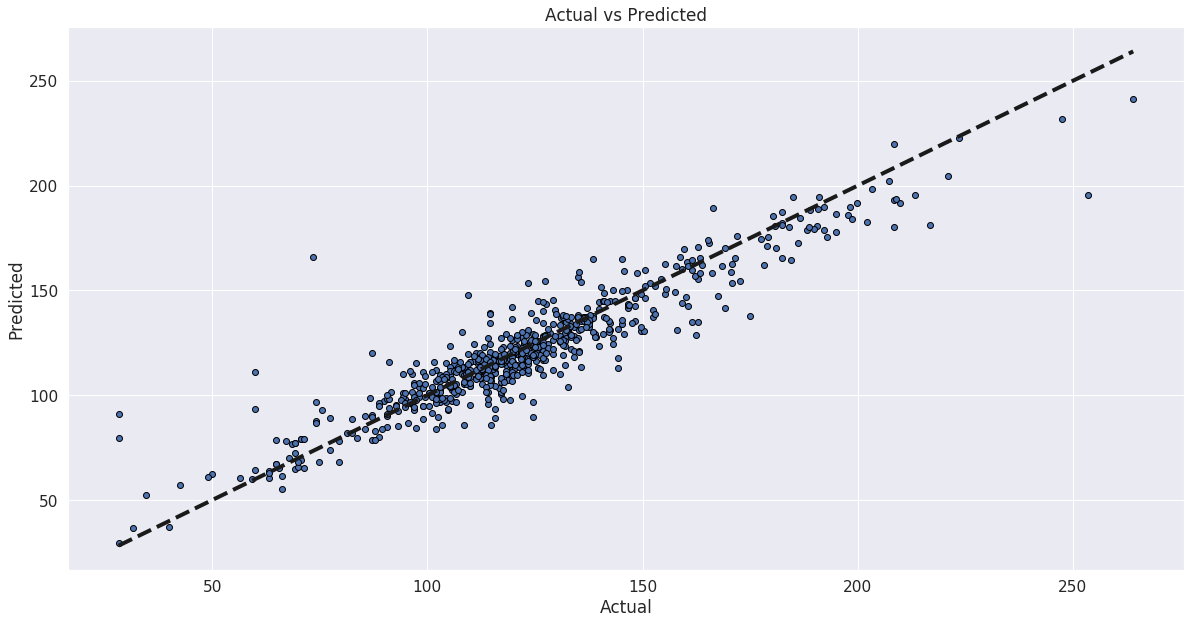

In [138]:
# FITTING THE MODEL
regr = xgb.XGBRegressor(colsample_bytree=0.6,
                       gamma=1.2,
                       learning_rate=0.01,
                       max_depth = 6,
                       min_child_weight = 2,
                       n_estimators=1000,
                       reg_alpha=1.5,
                       reg_lambda=1.0,
                       subsample=0.5,
                       seed=42,
                       silent=1)
regr.fit(X_train_scaled, y_train)

# PREDICTIONS
predictions_xg = regr.predict(X_test_scaled)

# EVALUATION
acc_xgboost = np.sqrt(metrics.mean_squared_error(y_test, predictions_xg))
r2_xgboost = r2_score(y_test, predictions_xg)

print("MSE of XGBoost is {}".format(acc_xgboost))
print("Coefficient of determination R^2 of the prediction is: {}".format(r2_xgboost))

from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
ax.scatter(y_test, predictions_xg, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

### Support Vector Regression

In [1527]:
##### BEST PARAMETERS MODEL #####

In [139]:
hyperparameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 0.01, 0.1, 0.2, 0.5],'C': [10, 100, 1000]}]
svr = GridSearchCV(SVR(epsilon = 0.01), hyperparameters, cv = 5)
svr.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 0.2, 0.5], 'C': [10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [140]:
print(svr.best_params_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
RMSE of SVR is 12.594803392675503
Coefficient of determination R^2 of the prediction is: 0.8393359783030252


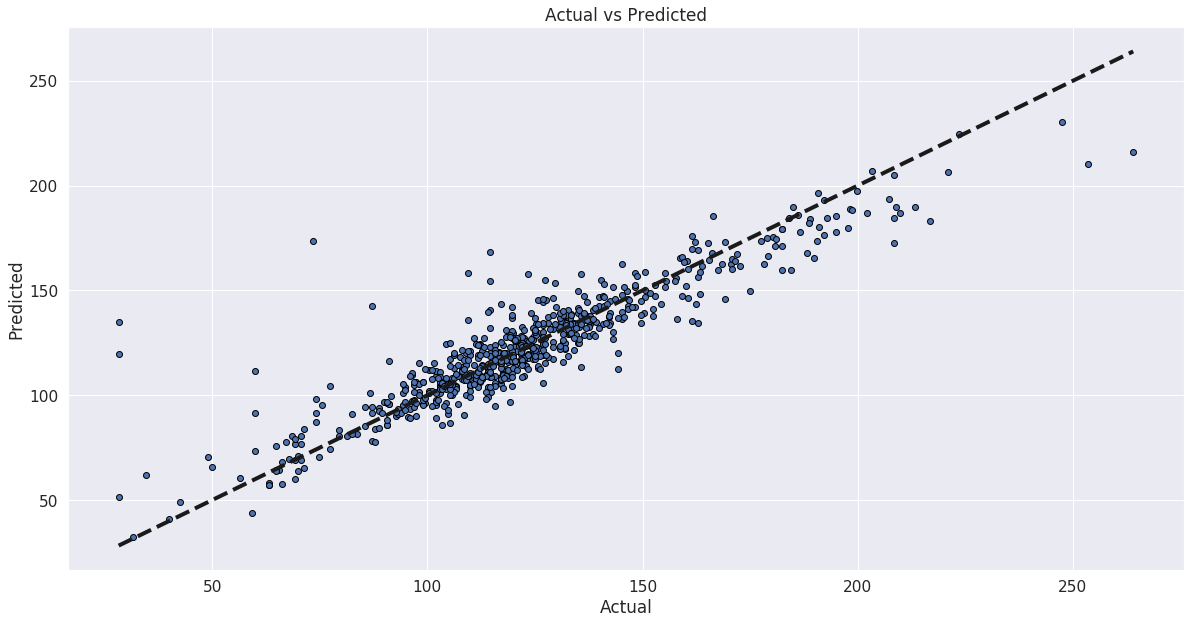

In [141]:
# FIT THE MODEL (radial kernel)
model_svr = SVR(C=100, gamma= 0.01, kernel='rbf')
print(model_svr)
model_svr.fit(X_train_scaled, y_train)

# PREDICTION
predictions_svr = model_svr.predict(X_test_scaled)

# EVALUATE
acc_svr = np.sqrt(metrics.mean_squared_error(y_test, predictions_svr))
r2_svr = r2_score(y_test, predictions_svr)
print("RMSE of SVR is {}".format(acc_svr))
print("Coefficient of determination R^2 of the prediction is: {}".format(r2_svr))

from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
ax.scatter(y_test, predictions_svr, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

### Deep Neural Network

In [142]:
X_train_scaled.shape

(2705, 44)

In [143]:
seed = 101
np.random.seed(seed)

# Model
model = Sequential()
model.add(Dense(200, input_dim=44, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(20, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adadelta())

feature_cols = X_train_scaled
labels = y_train

model.fit(np.array(feature_cols), np.array(labels), epochs=100, batch_size=32)

Epoch 1/100
2705/2705 [==============================] - 1s 389us/step - loss: 3574.2206
Epoch 2/100
2705/2705 [==============================] - 0s 76us/step - loss: 267.9332
Epoch 3/100
2705/2705 [==============================] - 0s 87us/step - loss: 239.6297
Epoch 4/100
2705/2705 [==============================] - 0s 133us/step - loss: 229.2514
Epoch 5/100
2705/2705 [==============================] - 0s 110us/step - loss: 215.0154
Epoch 6/100
2705/2705 [==============================] - 0s 93us/step - loss: 200.7683
Epoch 7/100
2705/2705 [==============================] - 0s 99us/step - loss: 193.1640
Epoch 8/100
2705/2705 [==============================] - 0s 106us/step - loss: 218.2695
Epoch 9/100
2705/2705 [==============================] - 0s 90us/step - loss: 191.8773
Epoch 10/100
2705/2705 [==============================] - 0s 67us/step - loss: 196.8781
Epoch 11/100
2705/2705 [==============================] - 0s 64us/step - loss: 188.5181
Epoch 12/100
2705/2705 [============

2705/2705 [==============================] - 0s 94us/step - loss: 94.3603
Epoch 94/100
2705/2705 [==============================] - 0s 94us/step - loss: 94.7359
Epoch 95/100
2705/2705 [==============================] - 0s 88us/step - loss: 104.3647
Epoch 96/100
2705/2705 [==============================] - 0s 85us/step - loss: 92.0753
Epoch 97/100
2705/2705 [==============================] - 0s 86us/step - loss: 100.9382
Epoch 98/100
2705/2705 [==============================] - 0s 116us/step - loss: 98.1084
Epoch 99/100
2705/2705 [==============================] - 0s 90us/step - loss: 103.5766
Epoch 100/100
2705/2705 [==============================] - 0s 81us/step - loss: 85.7248


In [144]:
# Evaluation on the test set created by train_test_split
model.evaluate(np.array(feature_cols), np.array(labels))

2705/2705 [==============================] - 0s 33us/step


79.92593639324421

In [145]:
# Predictions
predictions_dnn = model.predict(np.array(X_test_scaled))

MSE of DNN is 13.703110428882914
Coefficient of determination R^2 of the prediction is: 0.8098159182098574


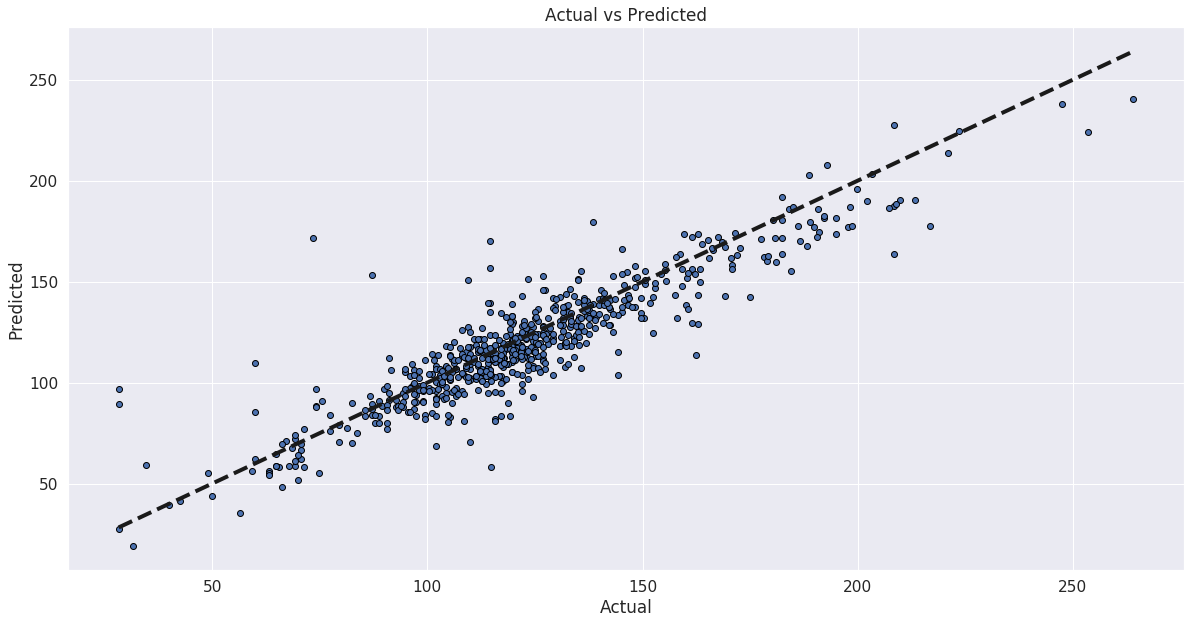

In [146]:
acc_dnn = np.sqrt(metrics.mean_squared_error(y_test, predictions_dnn))
r2_dnn = r2_score(y_test, predictions_dnn)
print("MSE of DNN is {}".format(acc_dnn))
print("Coefficient of determination R^2 of the prediction is: {}".format(r2_dnn))

from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
ax.scatter(y_test, predictions_dnn, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

## 6. Model Evaluation

In [147]:
models = pd.DataFrame({
    "Model":["Multiple Linear Regression", "Ridge Regression", "Lasso Regression",
            "Random Forest", "XGBoost", "Support Vector Regression", "DNN"],
    "Score": [
        acc_mle,
        acc_ridge,
        acc_lasso,
        acc_rf,
        acc_xgboost,
        acc_svr,
        acc_dnn
    ],
    "R^2": [
        r2_mle,
        r2_ridge,
        r2_lasso,
        r2_rf,
        r2_xgboost,
        r2_svr,
        r2_dnn
    ]
})

models.sort_values(by="Score", ascending=True)

,Model,Score,R^2
4,XGBoost,11.434401,0.867577
3,Random Forest,11.706100,0.861209
5,Support Vector Regression,12.594803,0.839336
0,Multiple Linear Regression,13.475433,0.816083
2,Lasso Regression,13.546343,0.814143
1,Ridge Regression,13.554894,0.813908
6,DNN,13.703110,0.809816


## 7. Final Prediction

### Ensemble Method

I will take my top 3 model and create another model. The weights assigned to them is according to their individual model performance.

In [148]:
df = pd.DataFrame()
df["predicted_rf"] = predictions_rf*0.4
df["predicted_xgboost"] = predictions_xg*0.4
df["predicted_svr"] = predictions_svr*0.2
df

,predicted_rf,predicted_xgboost,predicted_svr
0,46.597489,45.901131,22.300038
1,39.022565,40.516384,20.173634
2,42.240348,43.076466,21.328068
3,65.065708,68.977264,37.205859
4,44.418442,45.402126,22.657696
5,42.056386,41.013184,20.005869
6,52.184624,52.535309,26.859958
7,45.065464,43.950127,17.395040
8,46.906373,45.936871,23.174260
9,36.553328,33.805805,18.064503


In [149]:
final_predicted = df.sum(axis=1)

In [150]:
df_test = pd.DataFrame()
df_test["final_predicted"] = final_predicted
df_test["true_output"] = y_test
df_test

,final_predicted,true_output
0,114.798658,111.803399
1,99.712583,94.339811
2,106.644881,103.923048
3,171.248831,186.010752
4,112.478264,135.646600
5,103.075439,105.830052
6,131.579891,142.478068
7,106.410630,105.356538
8,116.017504,122.065556
9,88.423636,97.467943


RMSE of overall is 11.273008843573951
Coefficient of determination R^2 of the prediction is: 0.8712890356030758


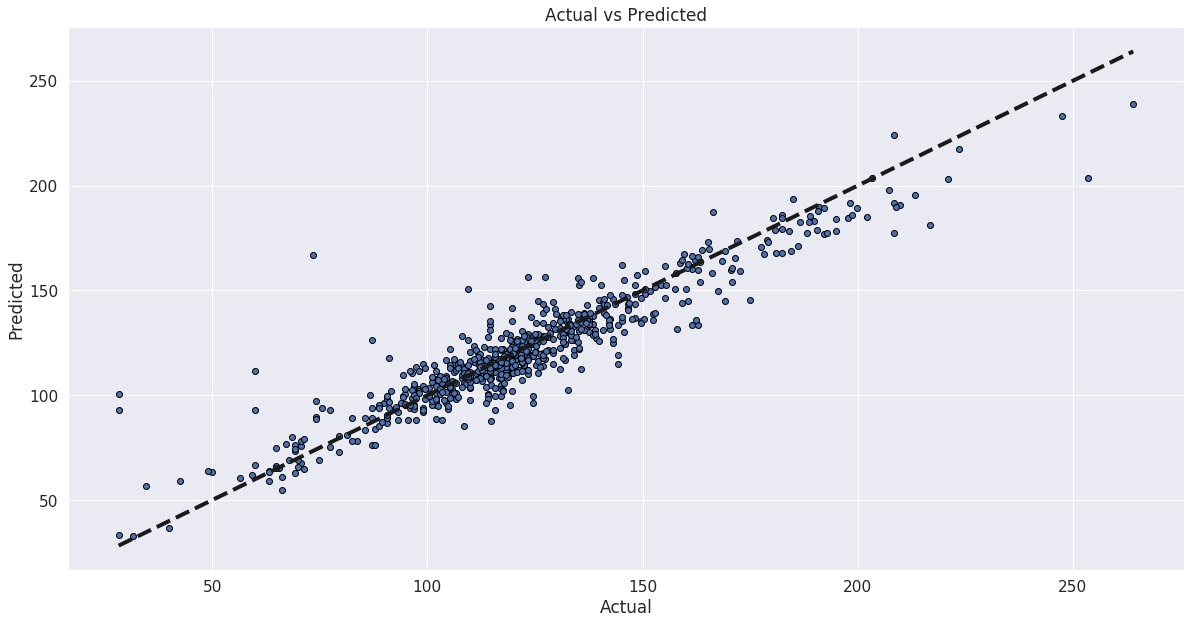

In [151]:
acc_overall = np.sqrt(metrics.mean_squared_error(y_test, df_test["final_predicted"]))
r2_overall = r2_score(y_test, df_test["final_predicted"])
print("RMSE of overall is {}".format(acc_overall))
print("Coefficient of determination R^2 of the prediction is: {}".format(r2_overall))

fig, ax = plt.subplots()
ax.scatter(y_test, df_test["final_predicted"], edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [152]:
# CONVERT BACK TO ORIGINAL SCALE
final_predicted = pd.DataFrame(final_predicted)
final_predicted.columns = ["values"]
final_predicted["values"] = final_predicted["values"].apply(lambda x: x**2)

In [154]:
# EXPORT TO CSV
final_predicted.to_csv("results.csv")    